# Animacija u IPython notebooku
Napravit ćemo animaciju koristeći biblioteku [JSAnimation](https://github.com/jakevdp/JSAnimation).

__Upute__:
Na meniju kliknite na New, iskopirajte sljedeći link https://github.com/jakevdp/JSAnimation i pritsnite enter. Dalje pratite upute dane [ovdje](https://gist.github.com/gforsyth/188c32b6efe834337d8a). 

Ili, alternativno, samo iskopirajte projekt za ova predavanja.

In [2]:
from pylab import *
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation

In [3]:
from scipy.integrate import odeint

g = 9.82; L = 0.5; m = 0.1

def dx(x, t):
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    return [dx1, dx2, dx3, dx4]

x0 = [pi/2, pi/2, 0, 0]  # početno stanje
dt = 0.05
t = np.arange(0.0, 20, dt) # vremena
x = odeint(dx, x0, t)    # rješenje ODJ
# razdvojimo koordinate
x1 = L * sin(x[:,0])
y1 = -L * cos(x[:,0])
x2 = x1 + L * sin(x[:,1])
y2 = y1 - L * cos(x[:,1])


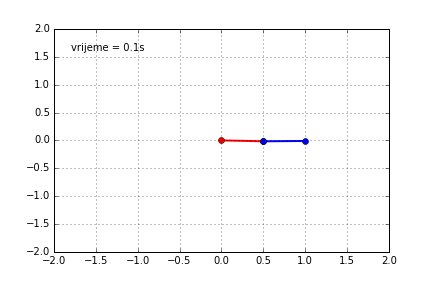
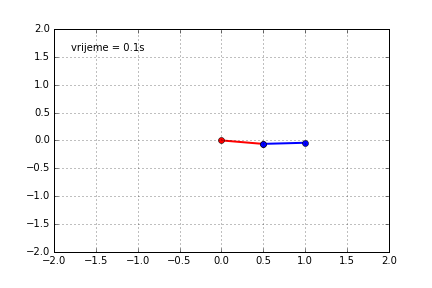
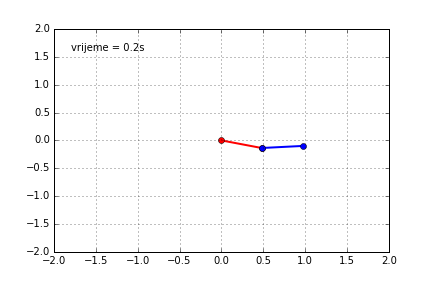
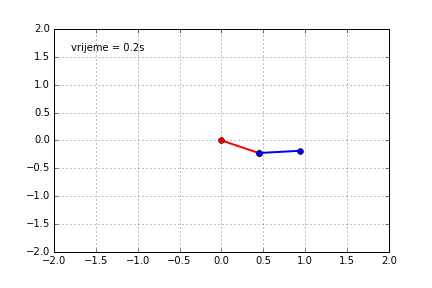
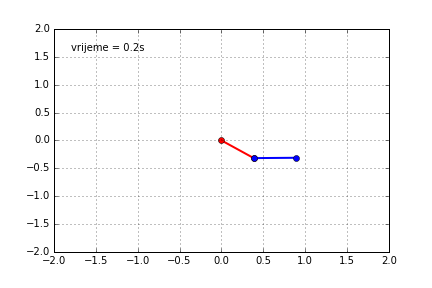
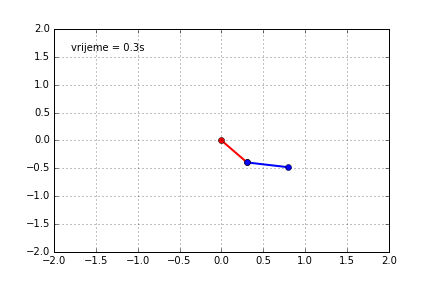
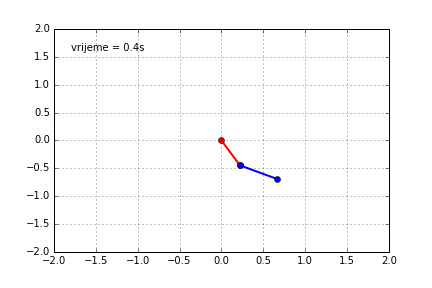
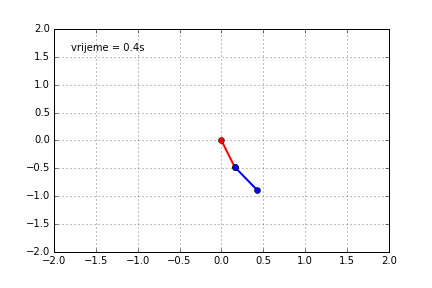
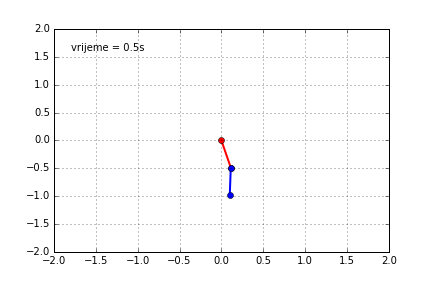
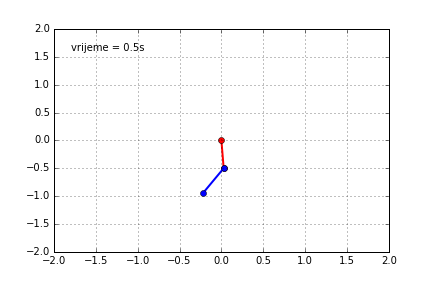
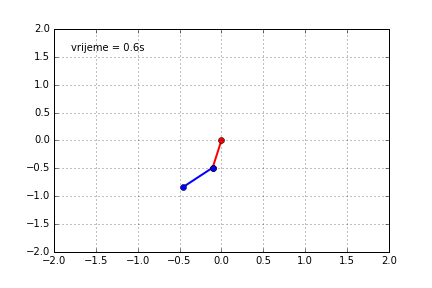
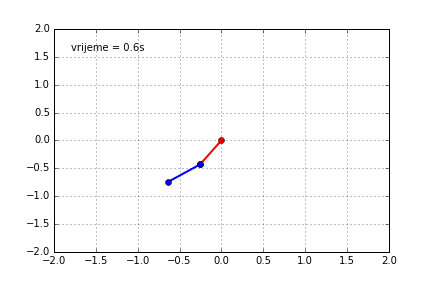
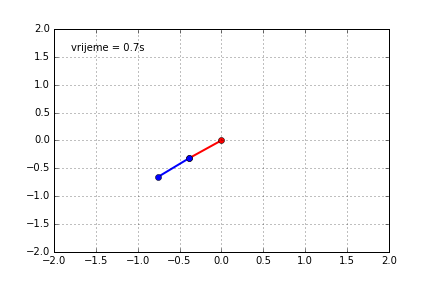
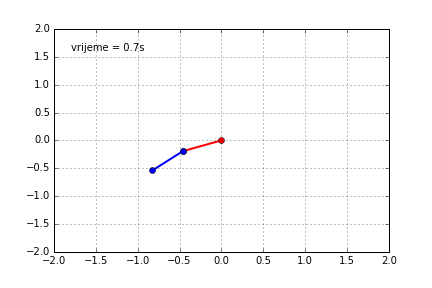
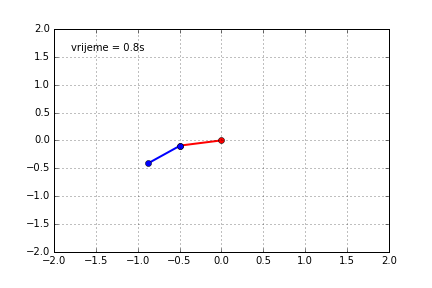
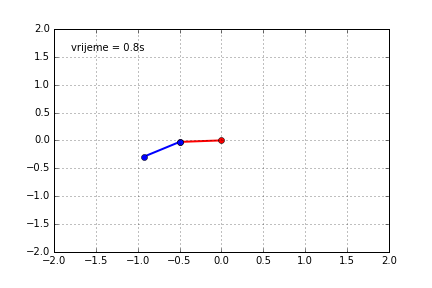
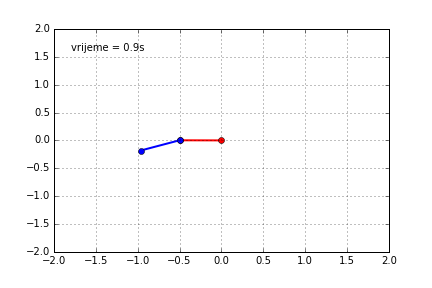
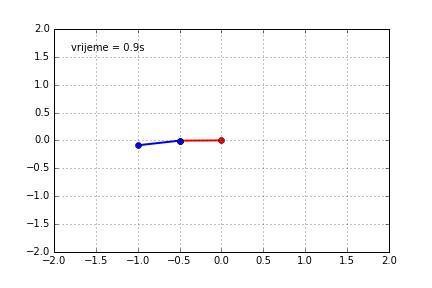
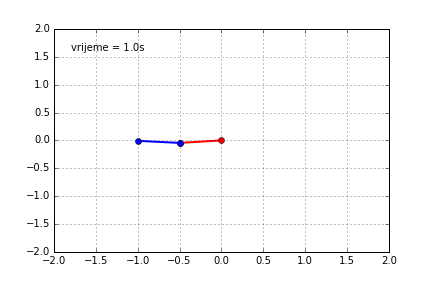
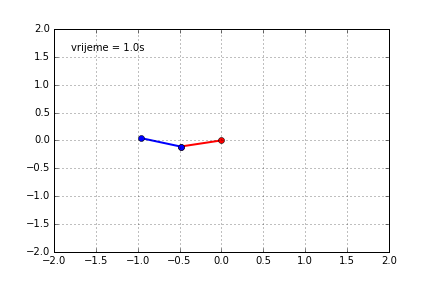
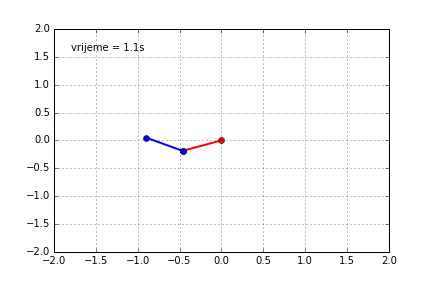
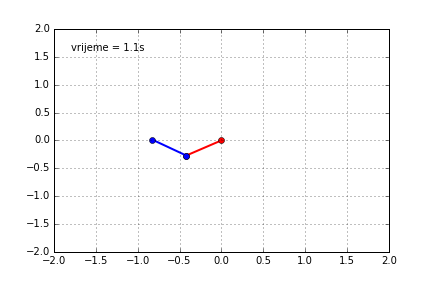
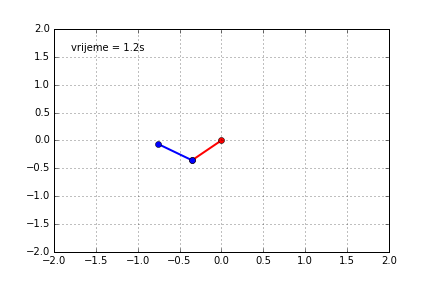
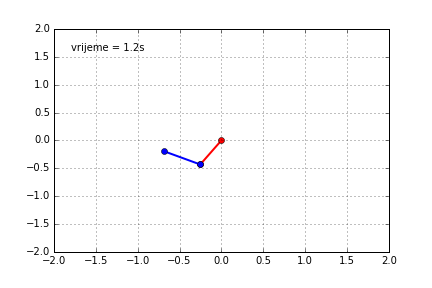
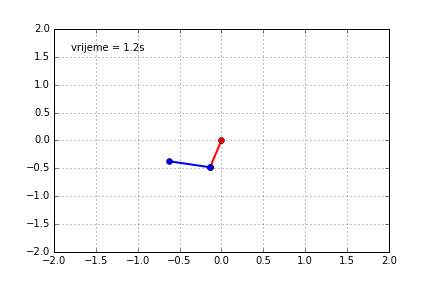
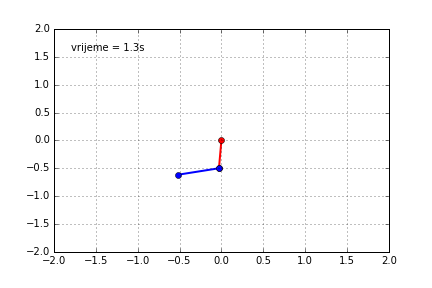
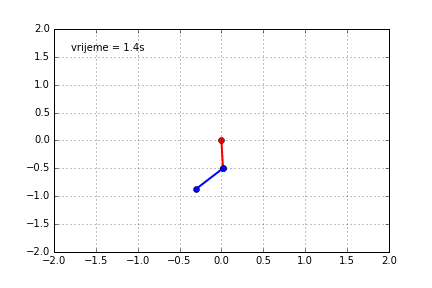
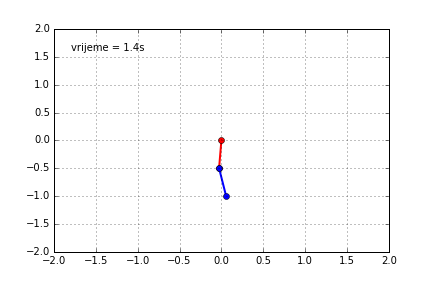
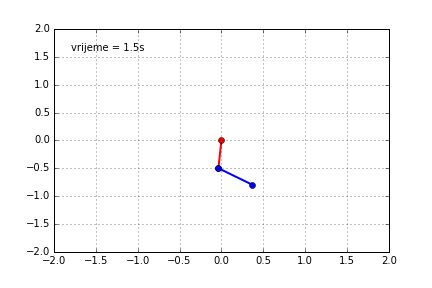
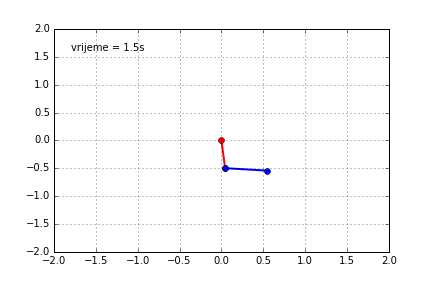
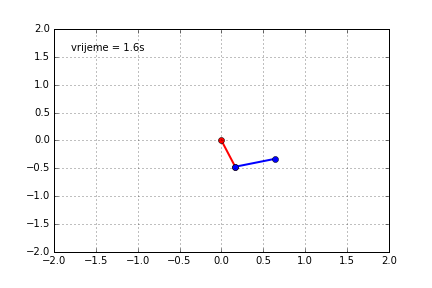
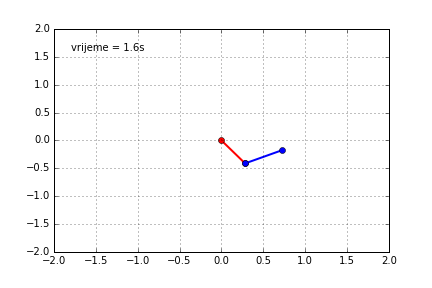
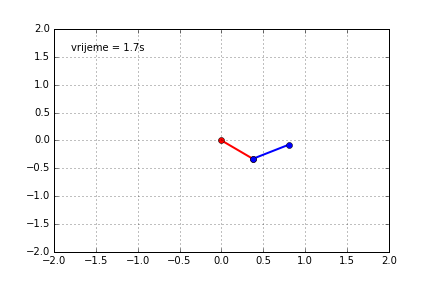
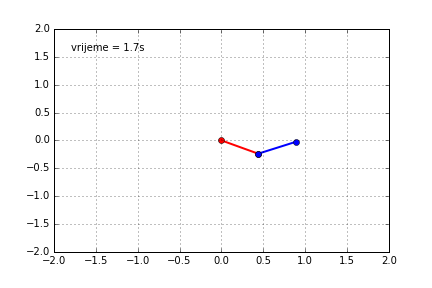
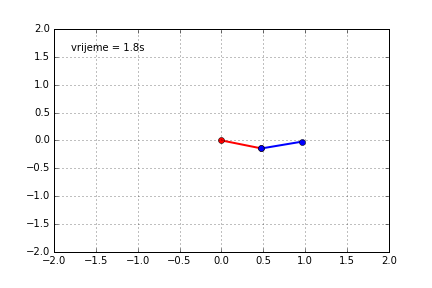
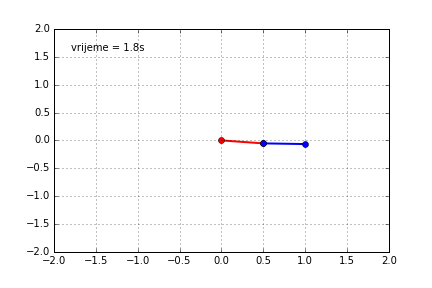
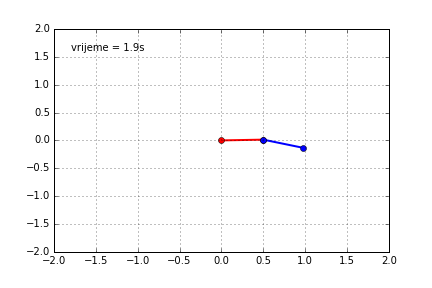
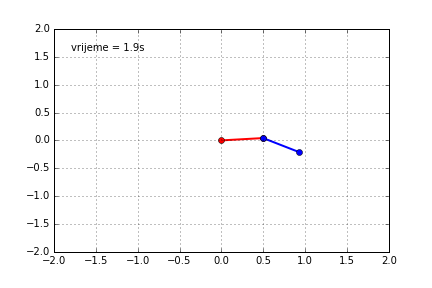
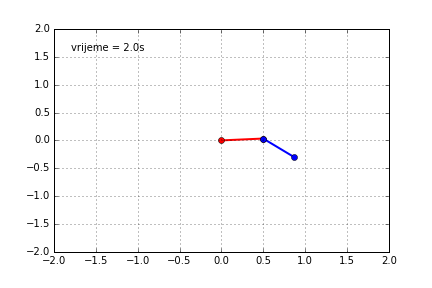
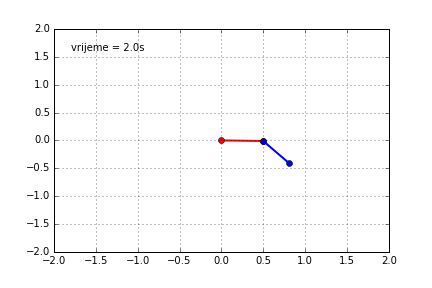
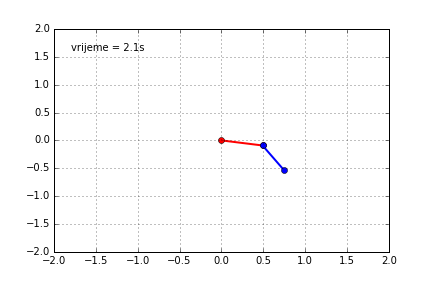
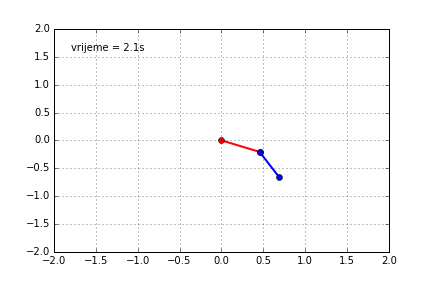
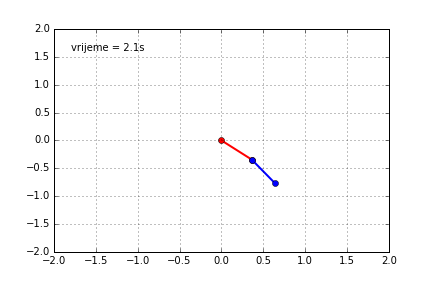
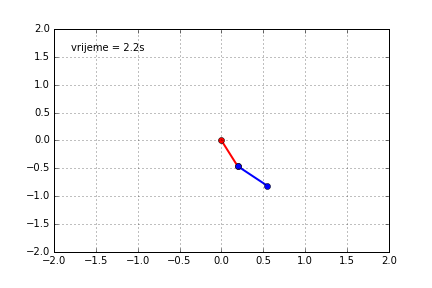
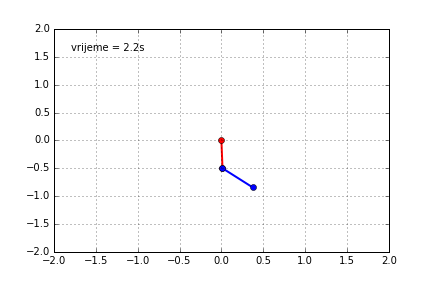
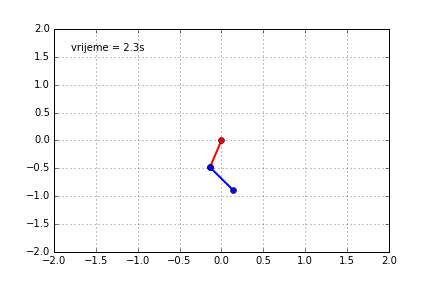
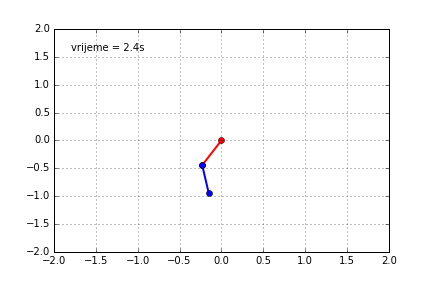
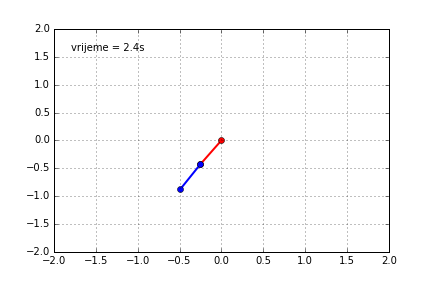
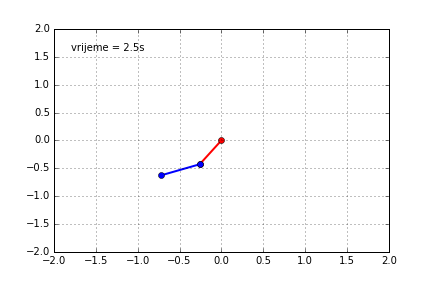
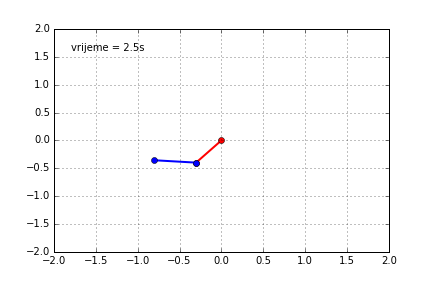
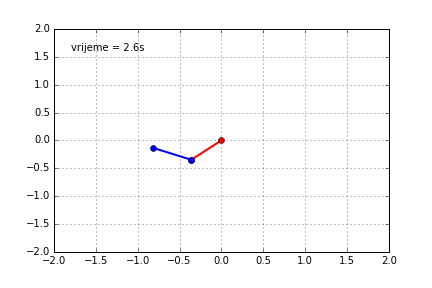
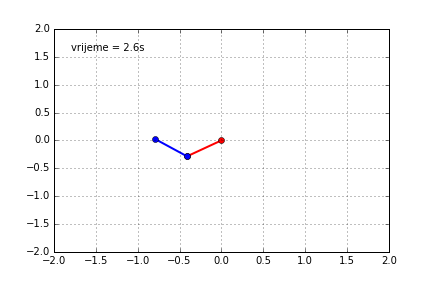
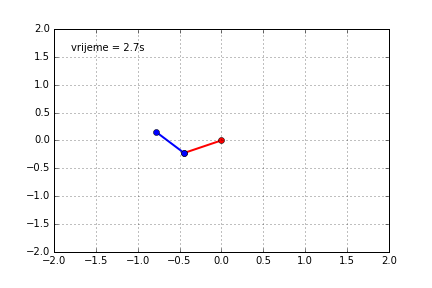
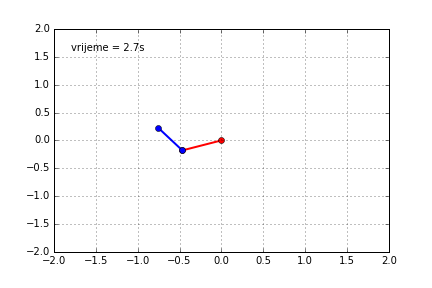
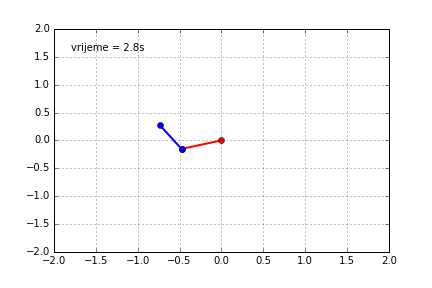
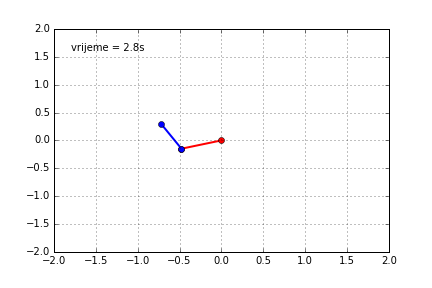
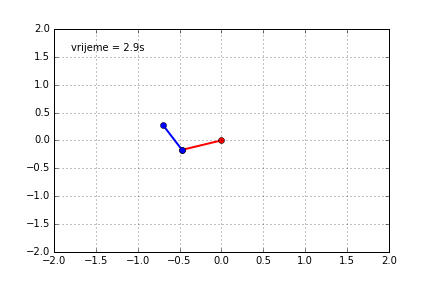
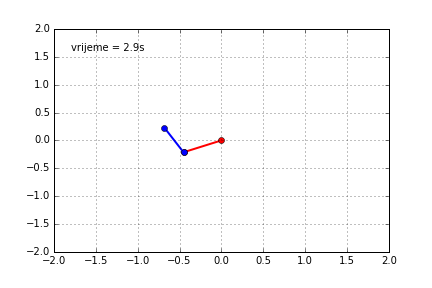
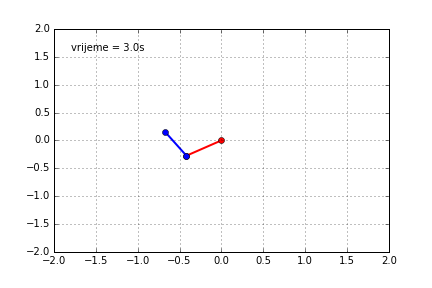
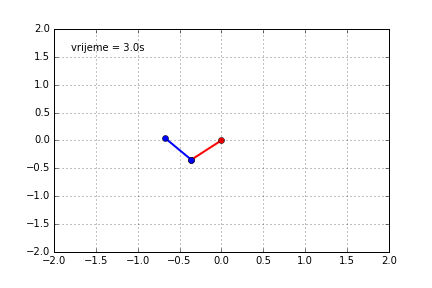
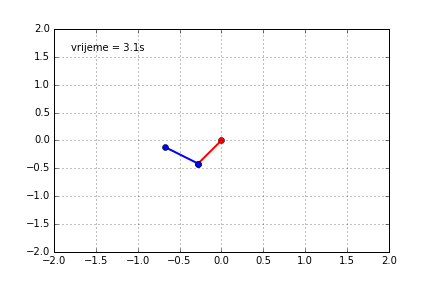
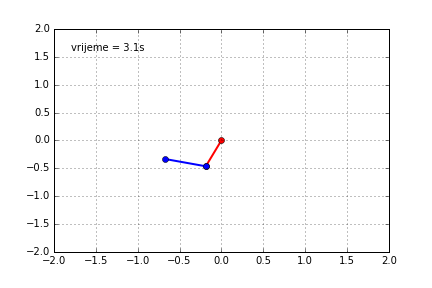
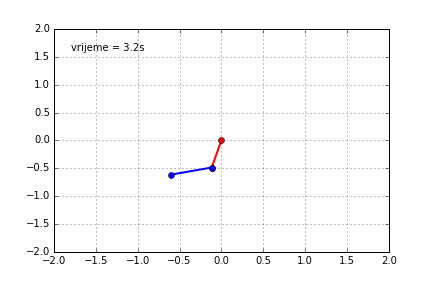
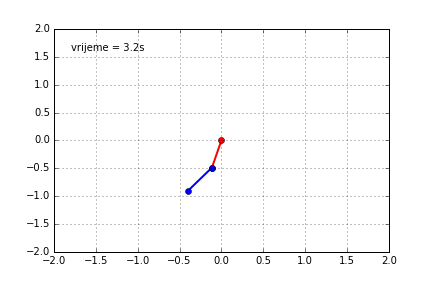
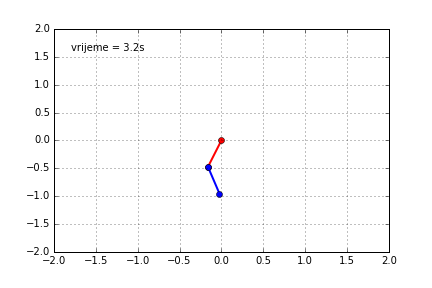
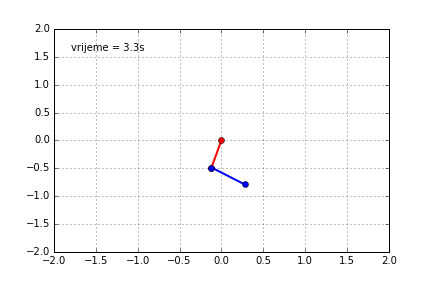
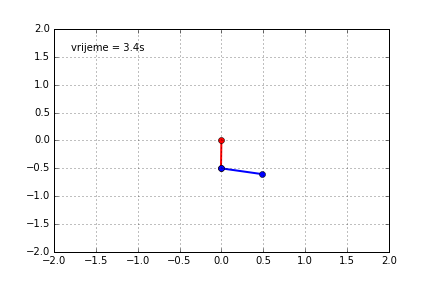
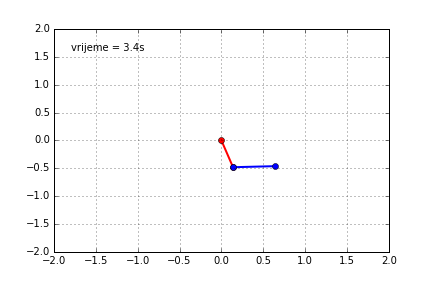
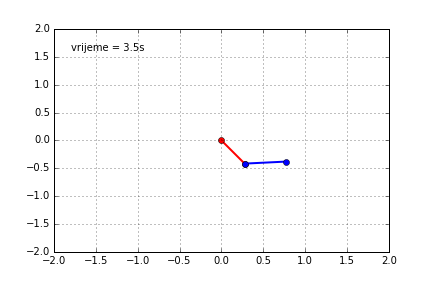
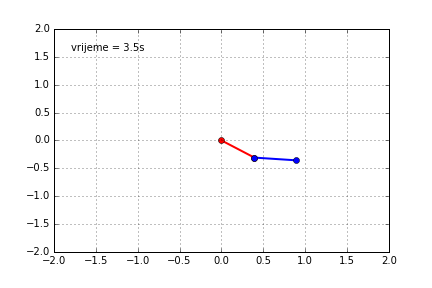
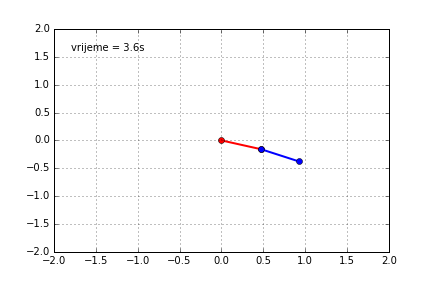
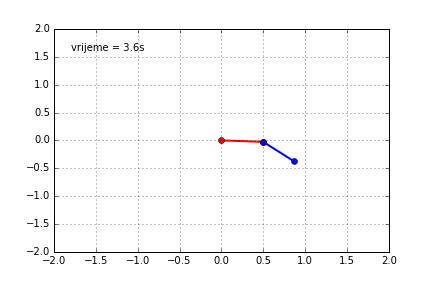
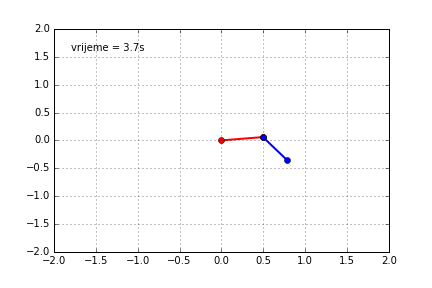
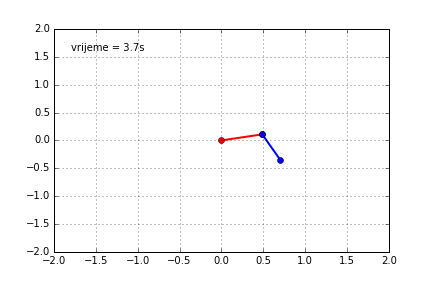
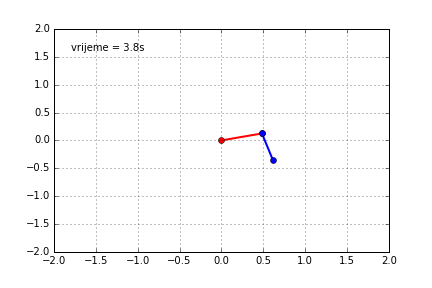
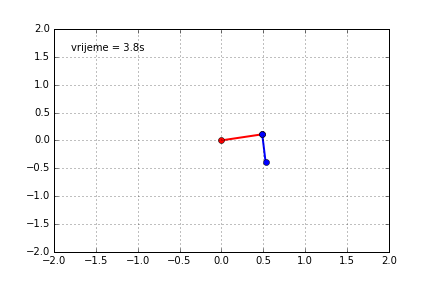
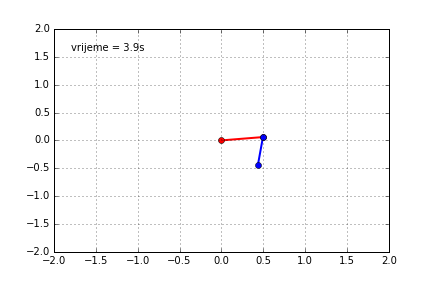
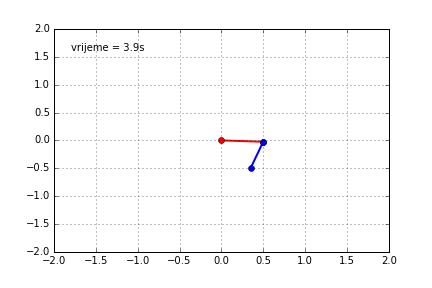
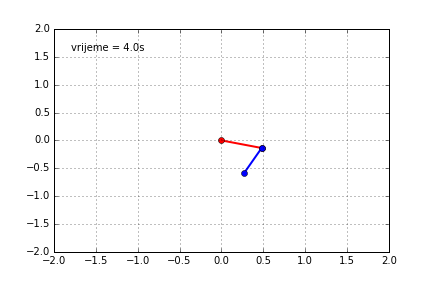
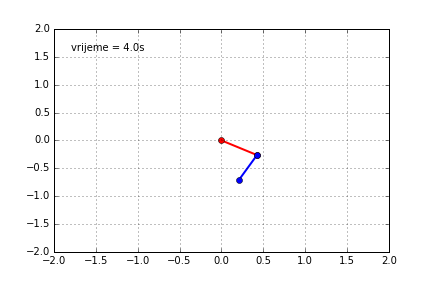
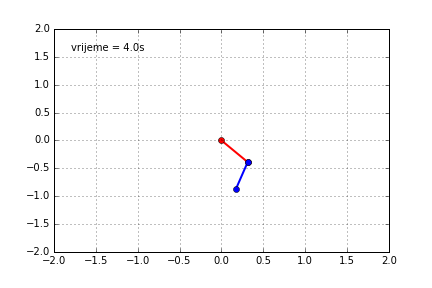
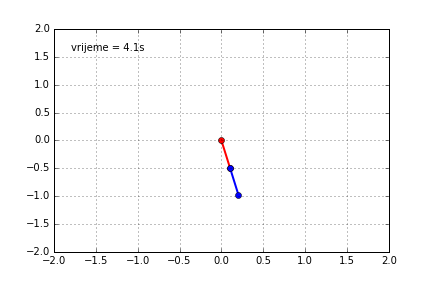
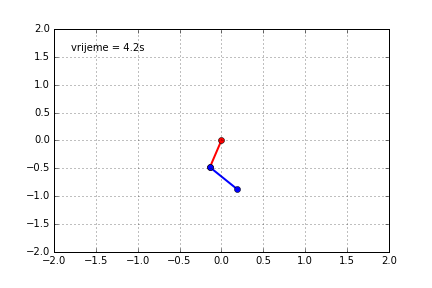
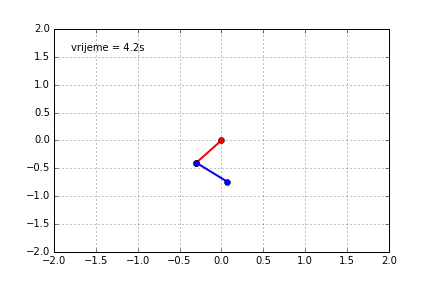
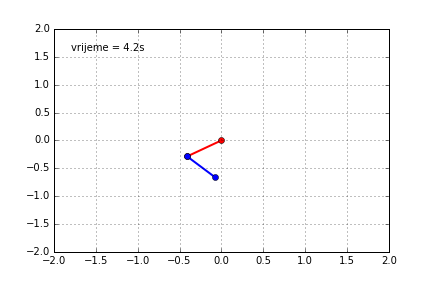
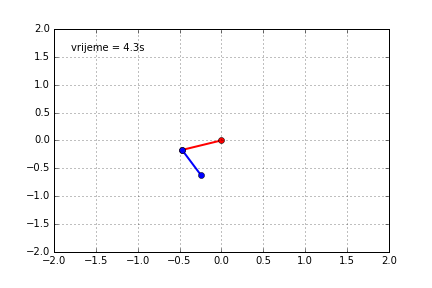
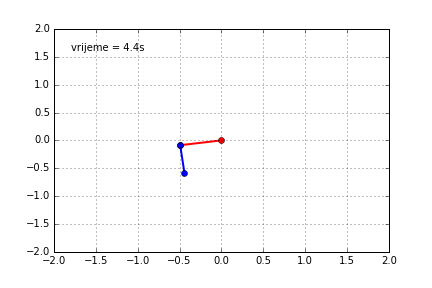
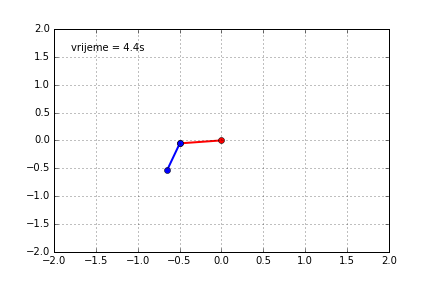
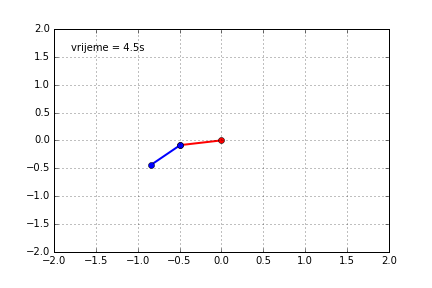
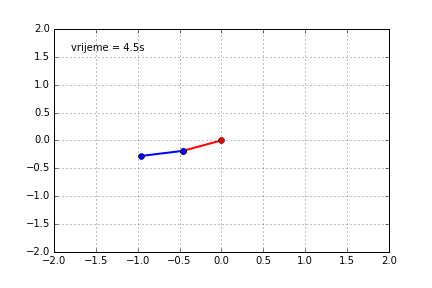
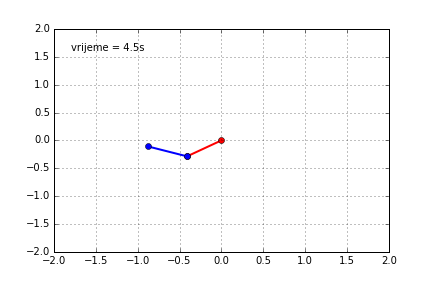
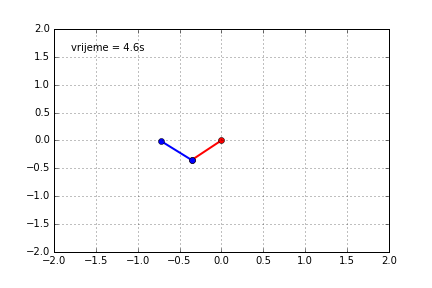
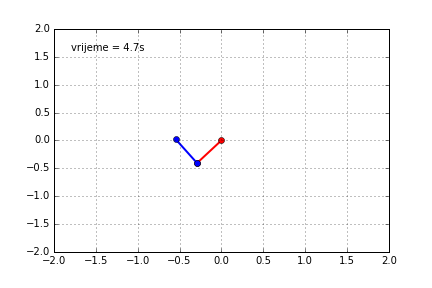
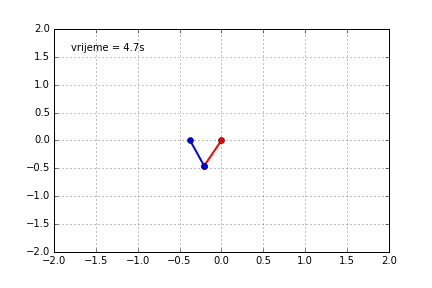
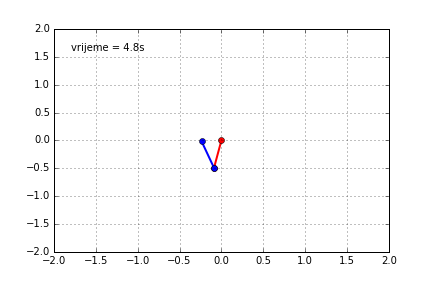
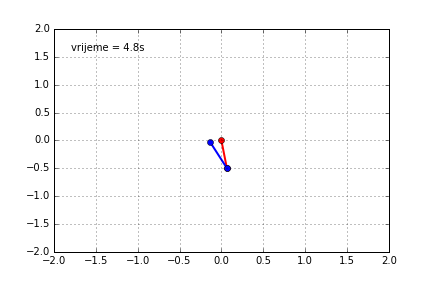
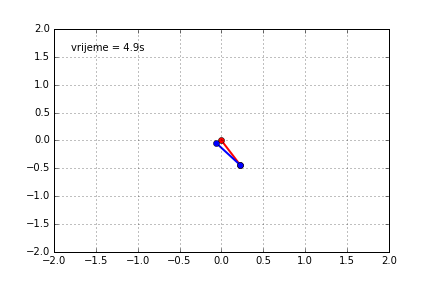
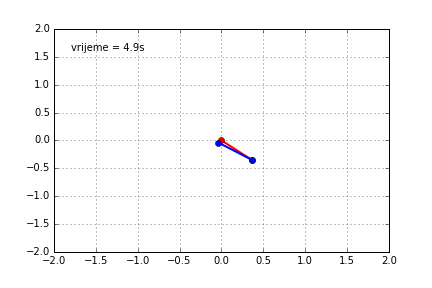
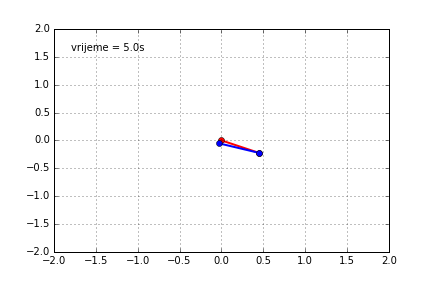
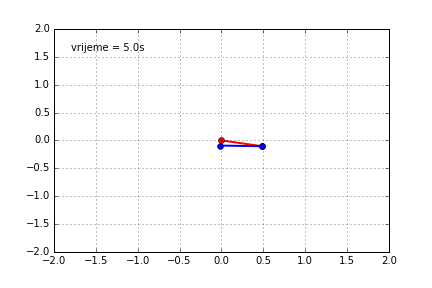
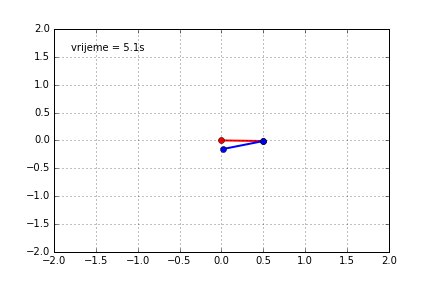
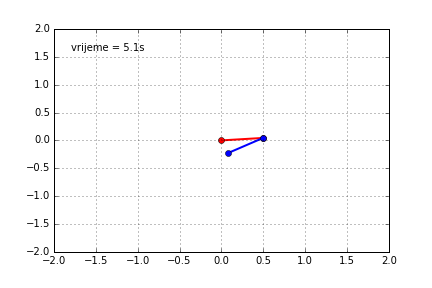
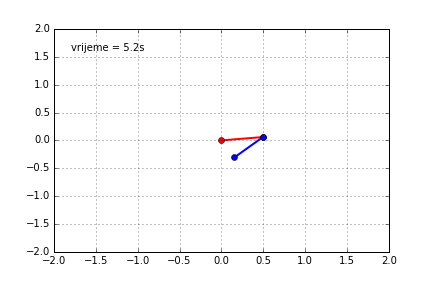
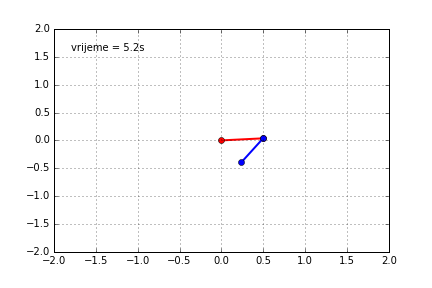
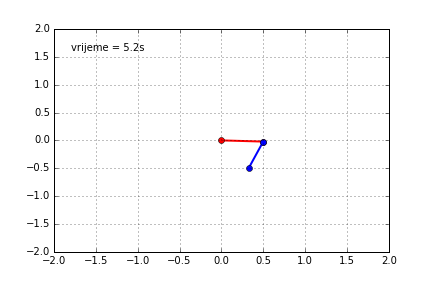
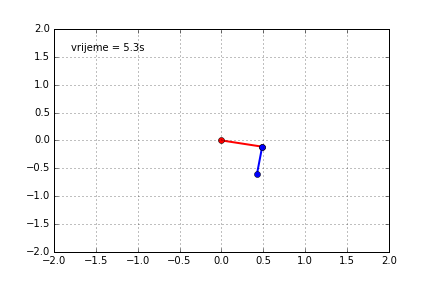
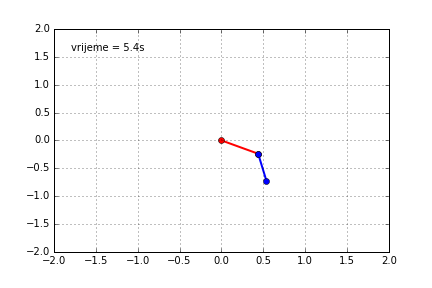
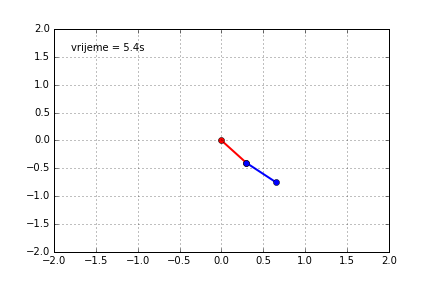
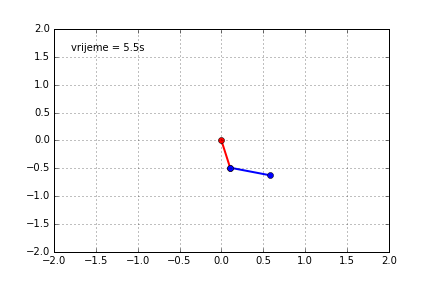
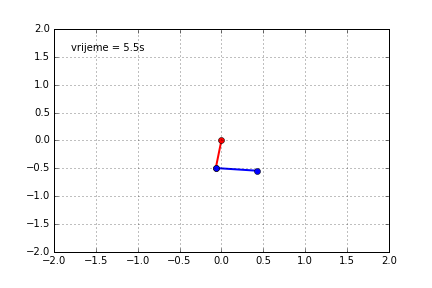
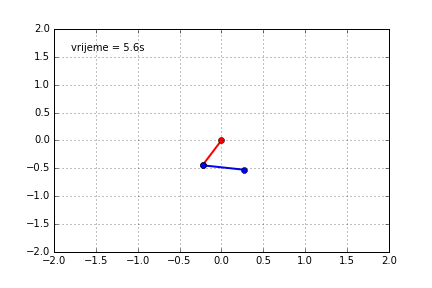
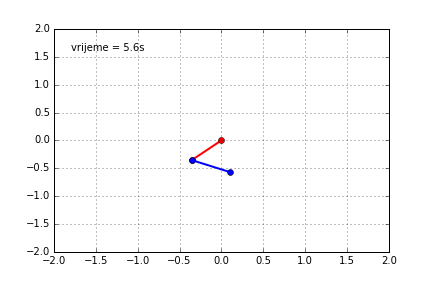
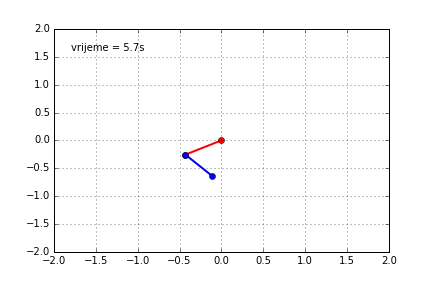
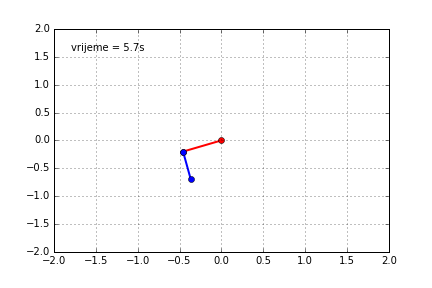
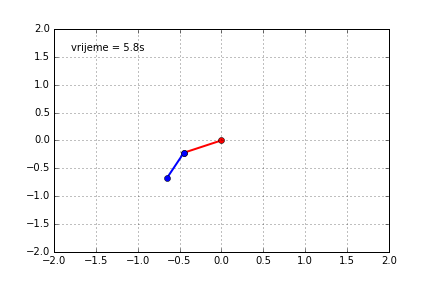
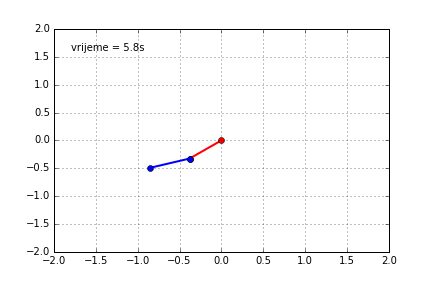
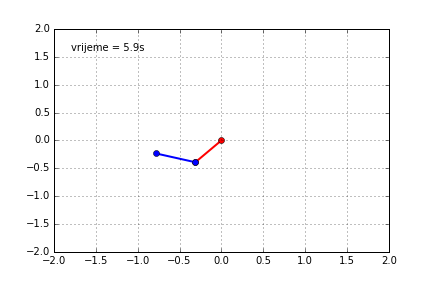
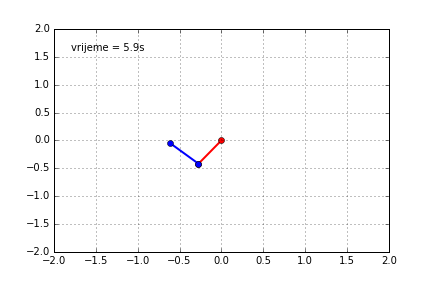
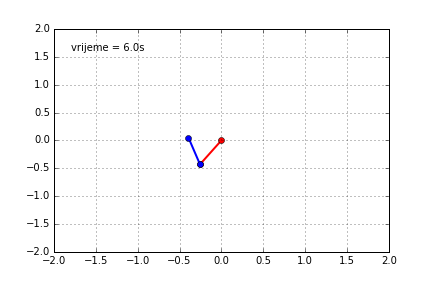
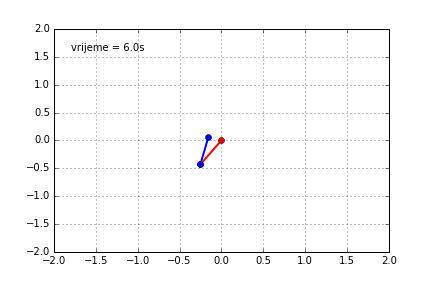
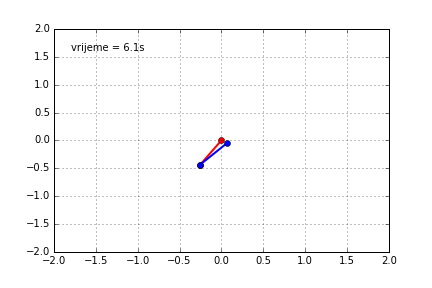
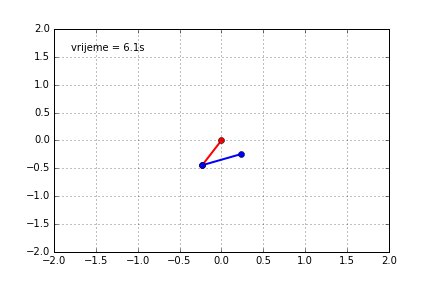
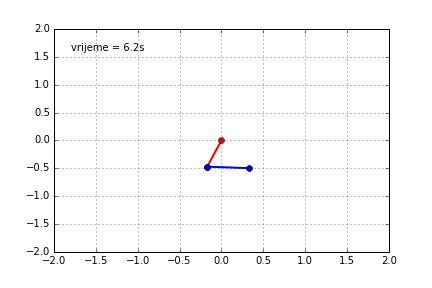
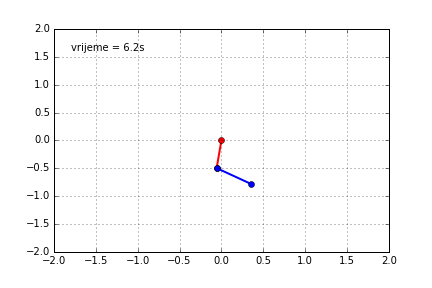
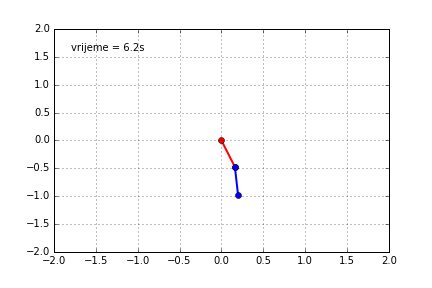
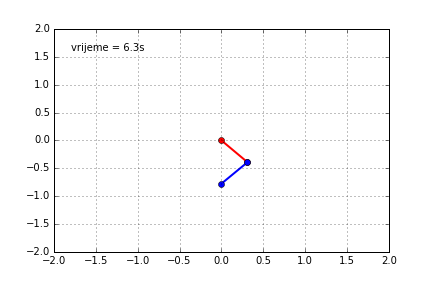
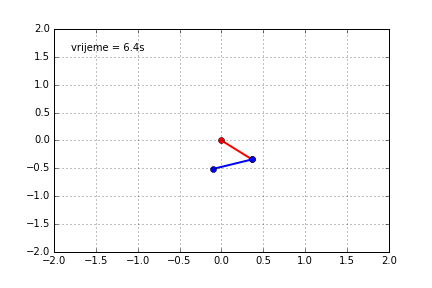
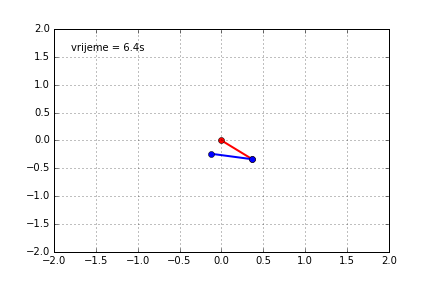
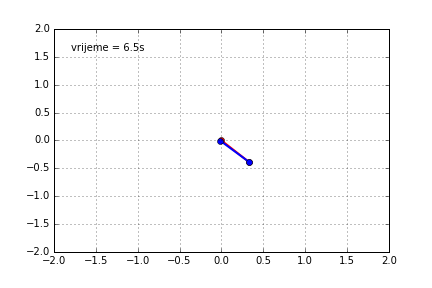
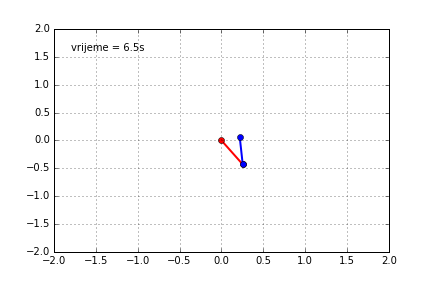
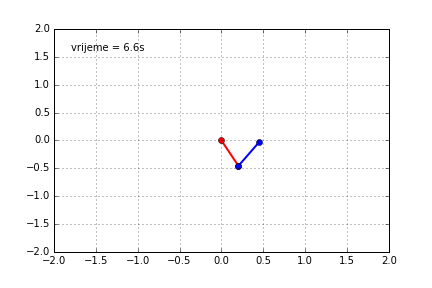
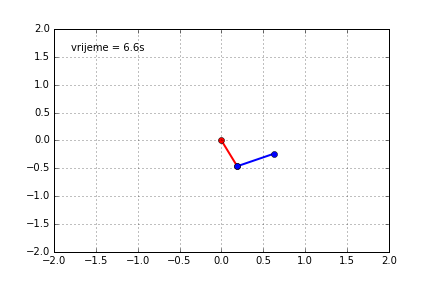
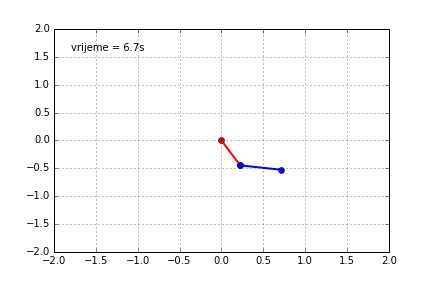
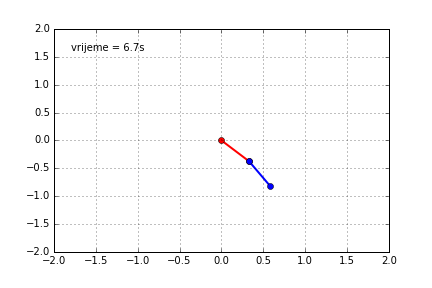
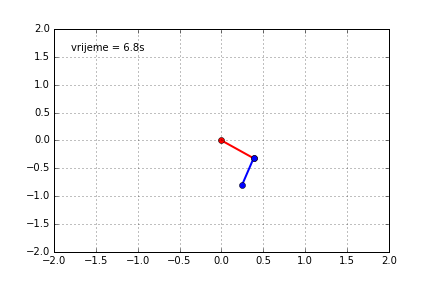
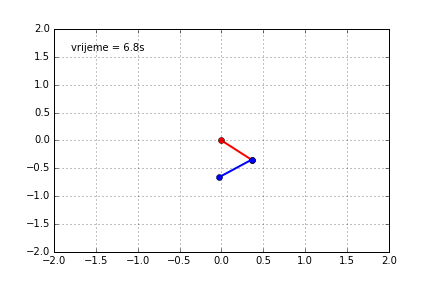
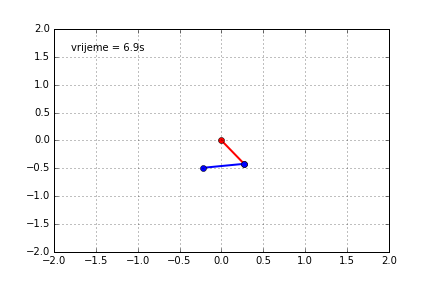
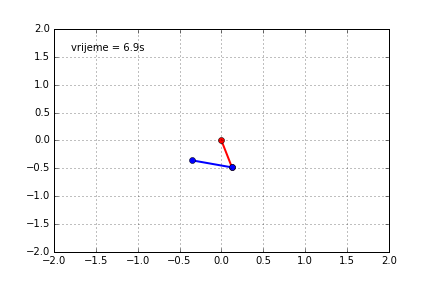
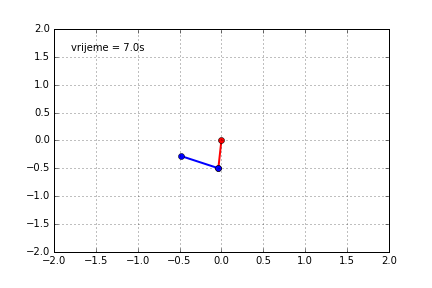
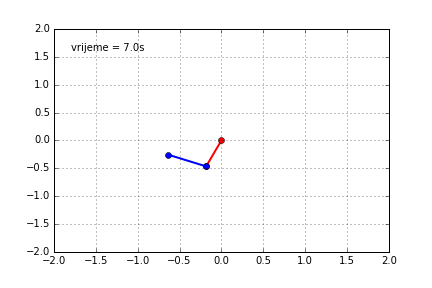
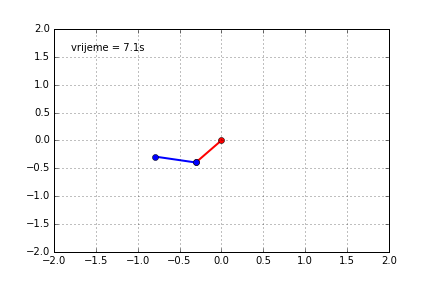
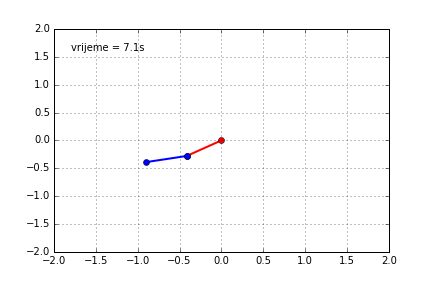
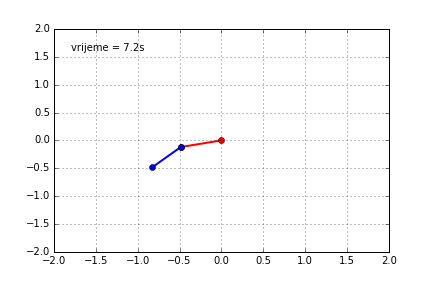
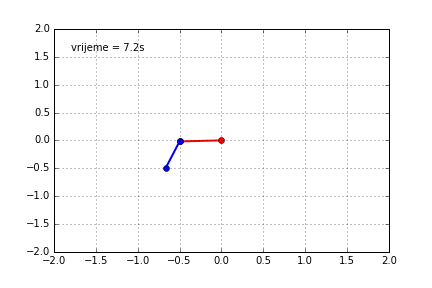
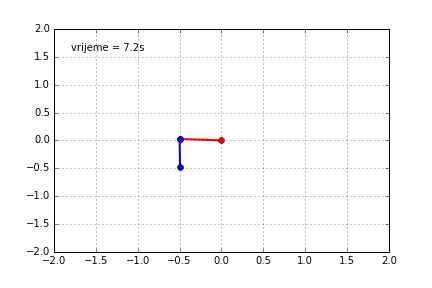
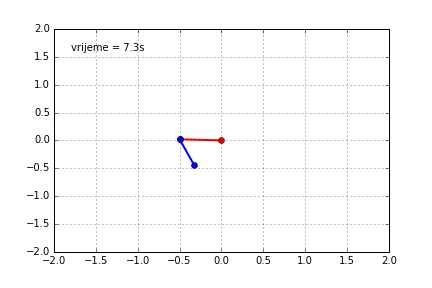
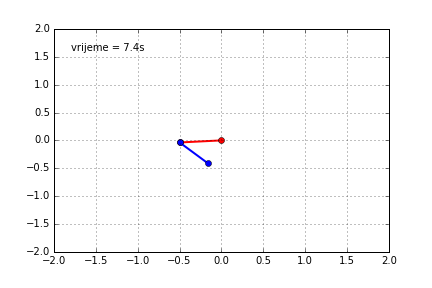
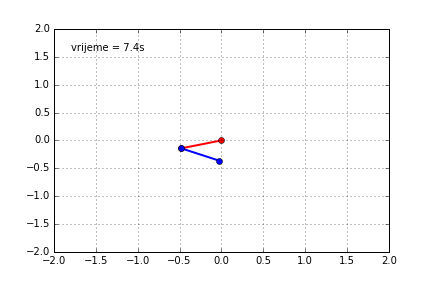
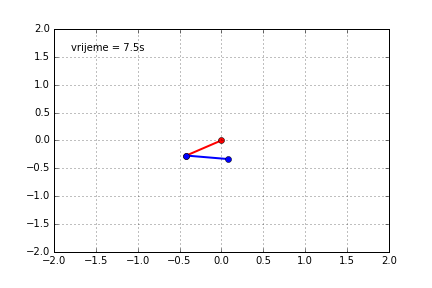
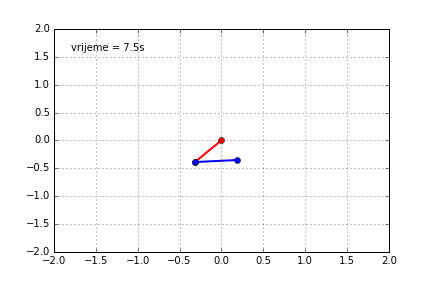
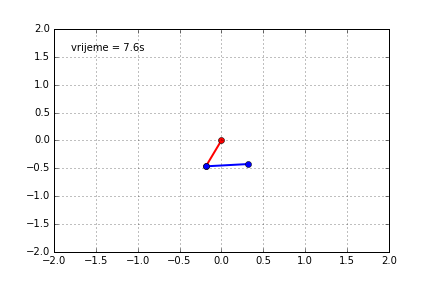
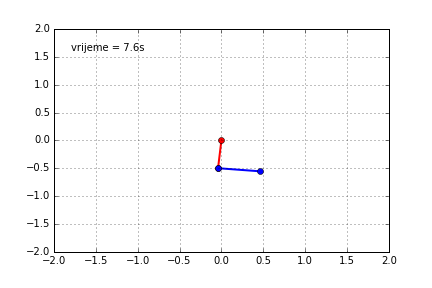
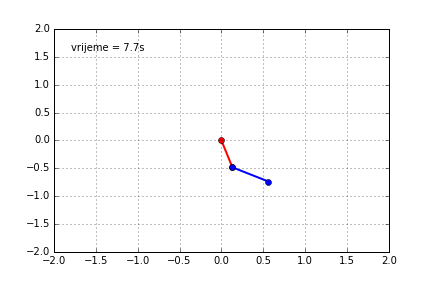
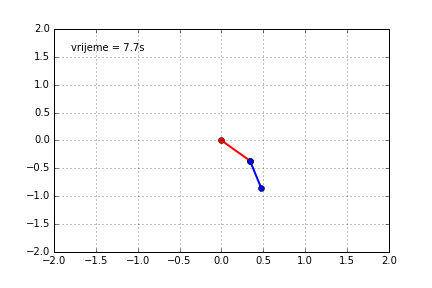
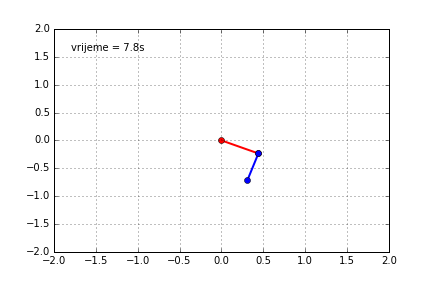
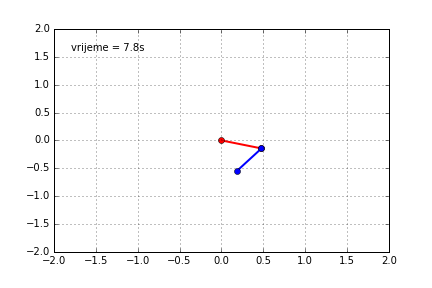
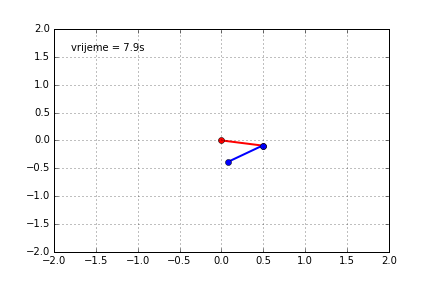
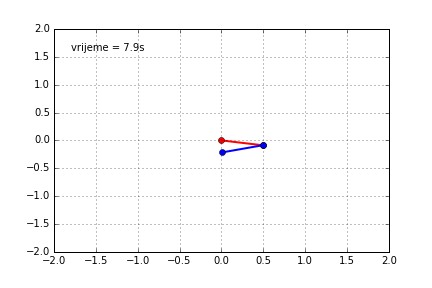
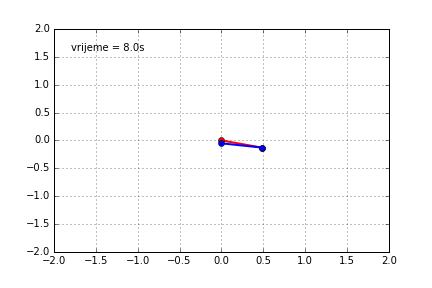
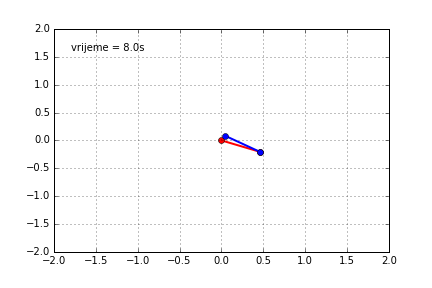
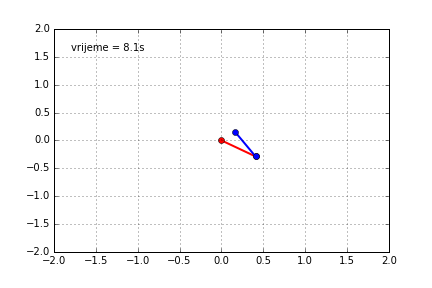
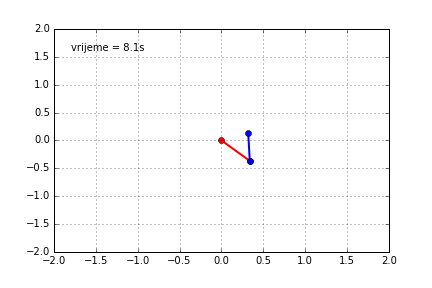
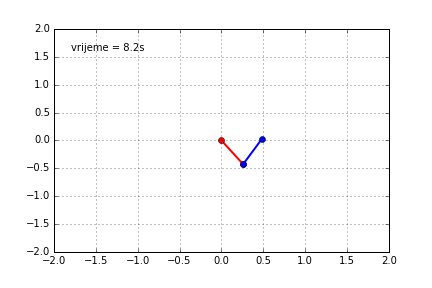
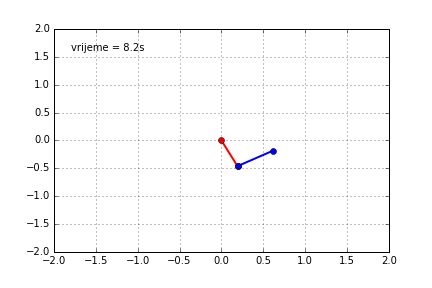
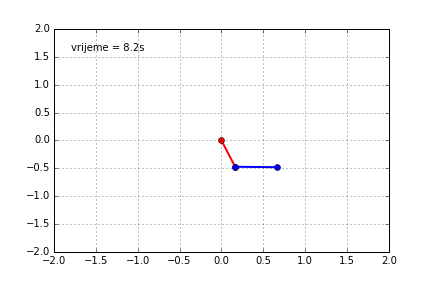
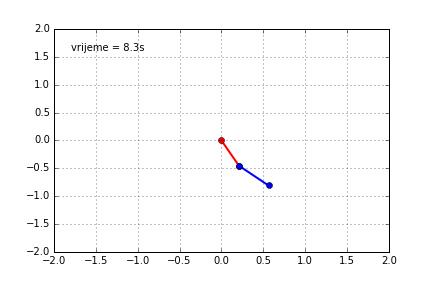
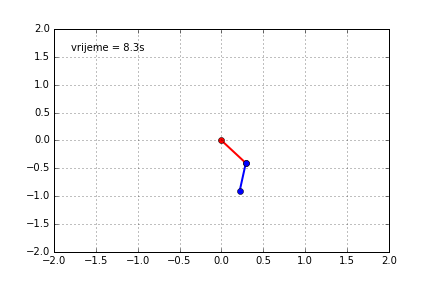
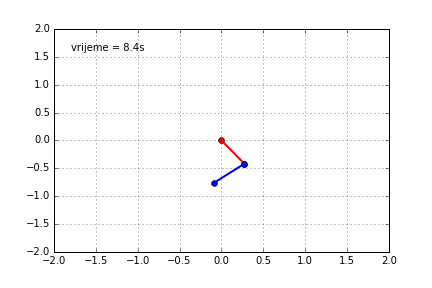
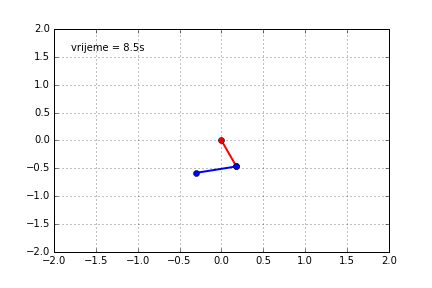
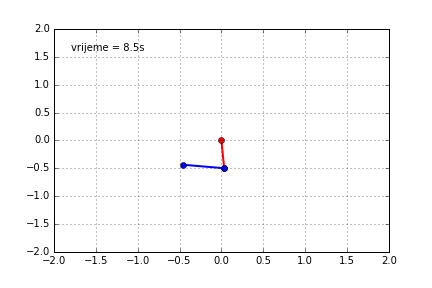
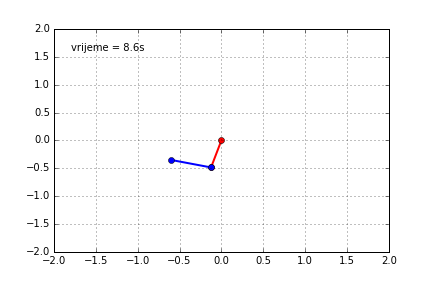
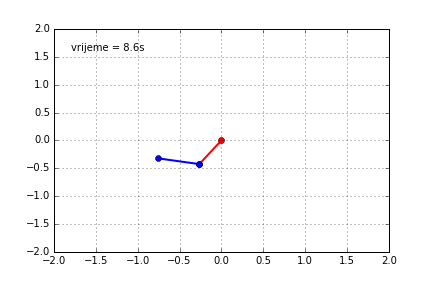
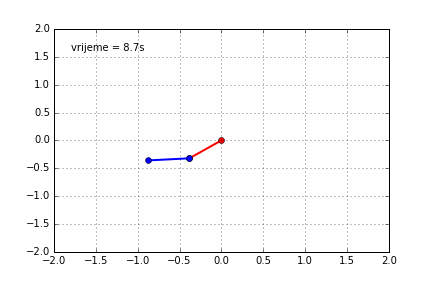
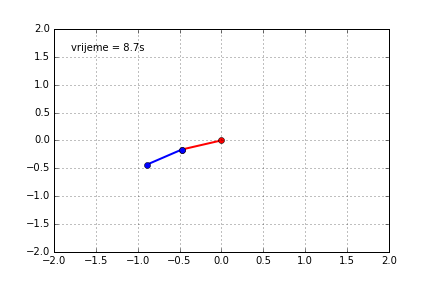
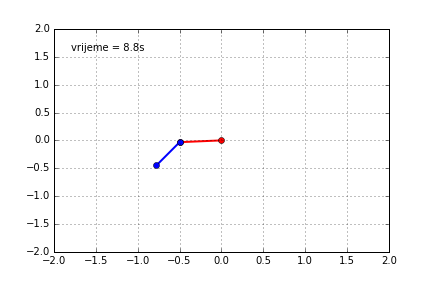
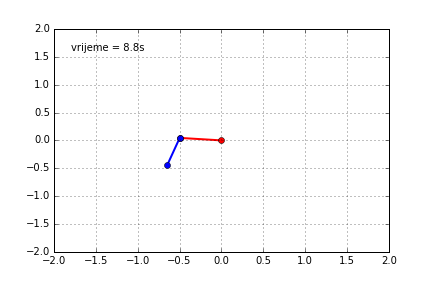
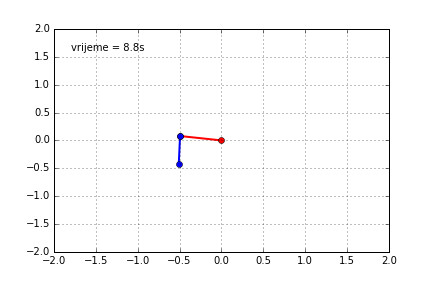
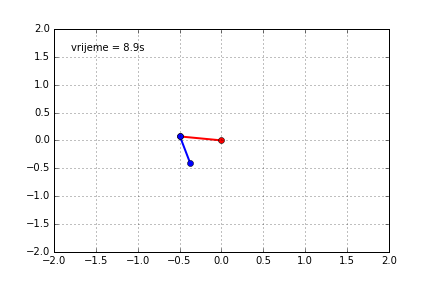
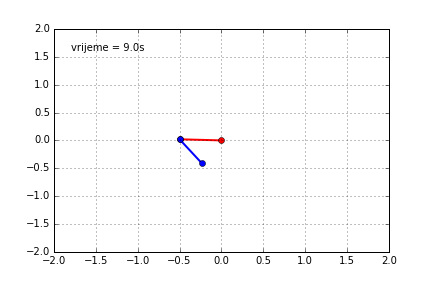
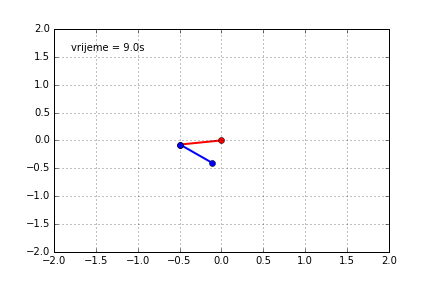
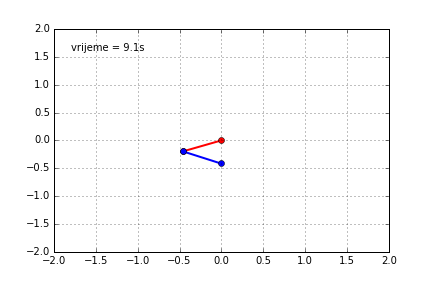
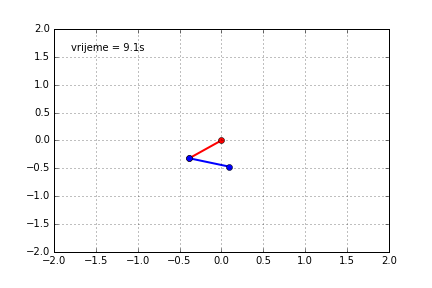
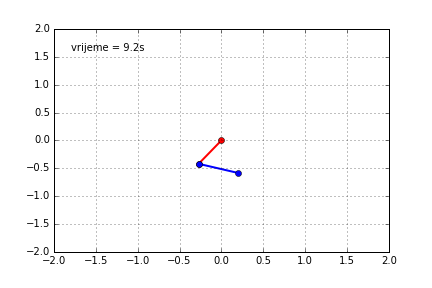
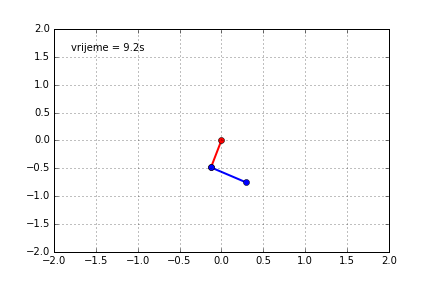
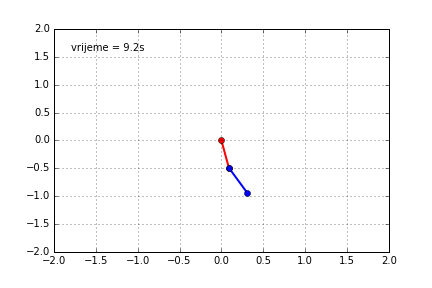
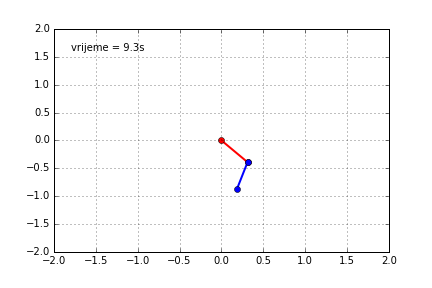
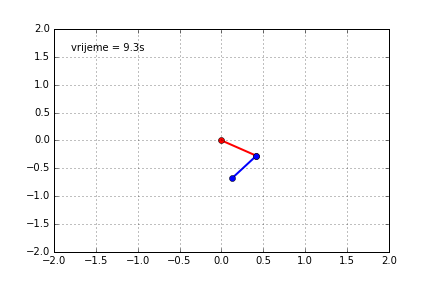
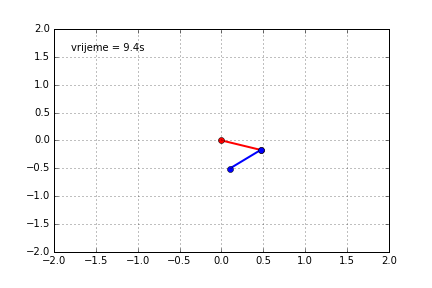
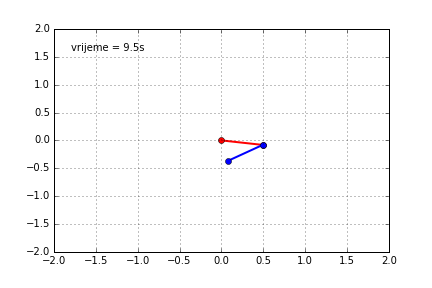
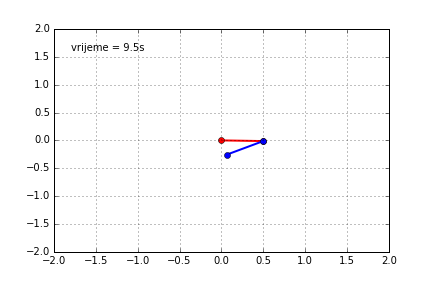
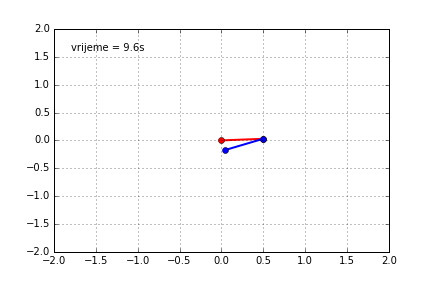
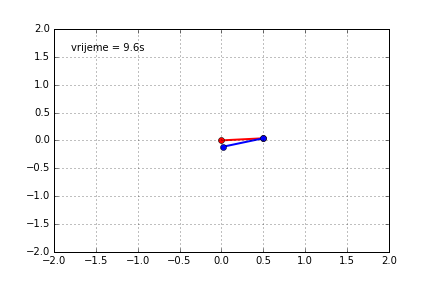
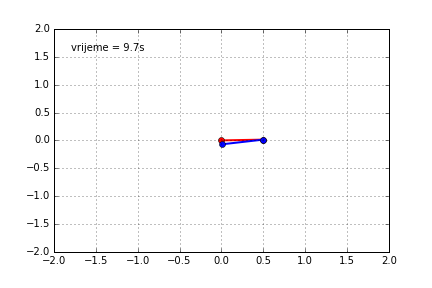
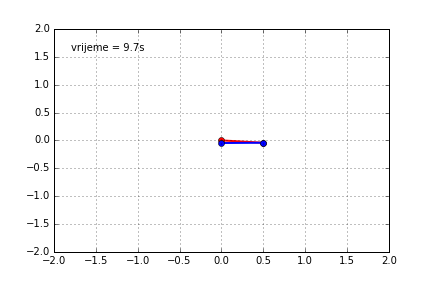
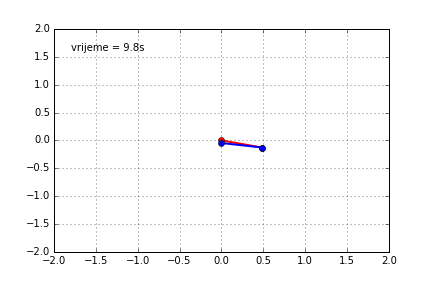
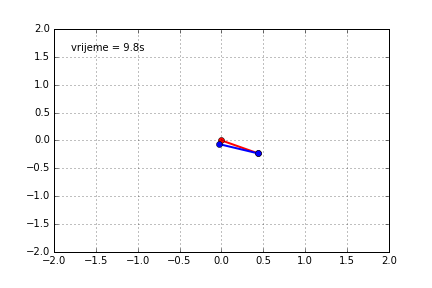
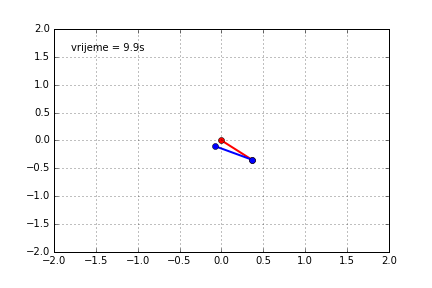
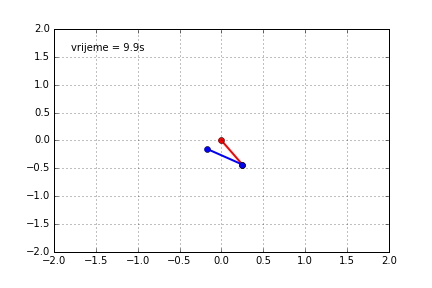
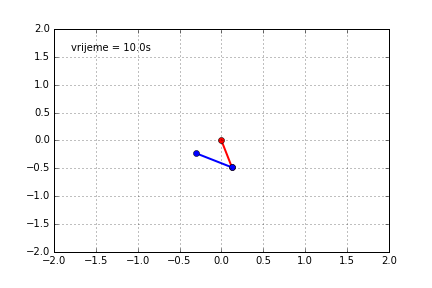
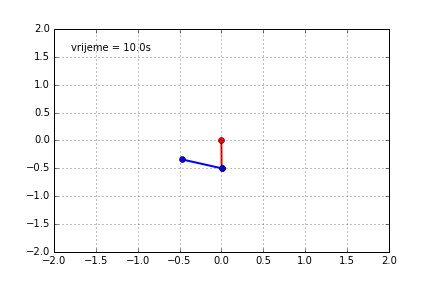
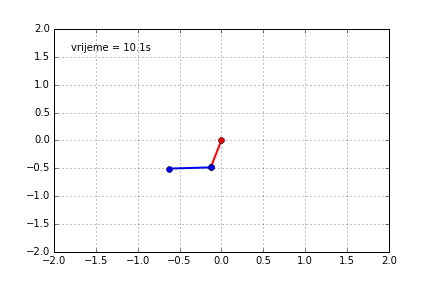
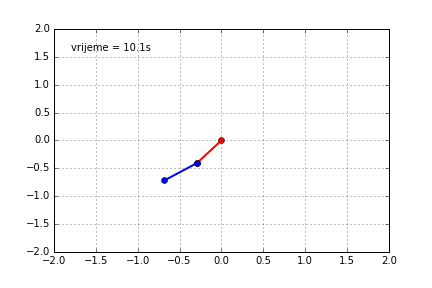
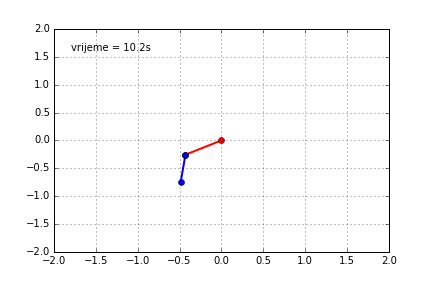
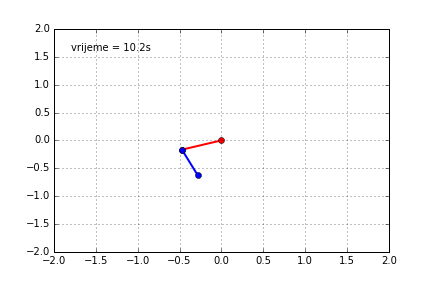
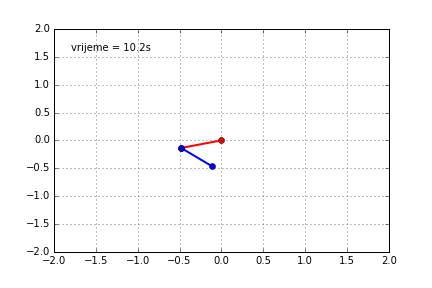
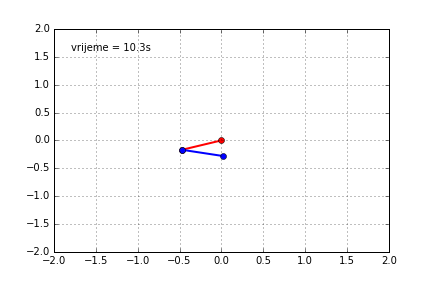
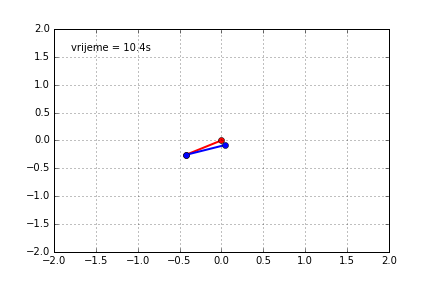
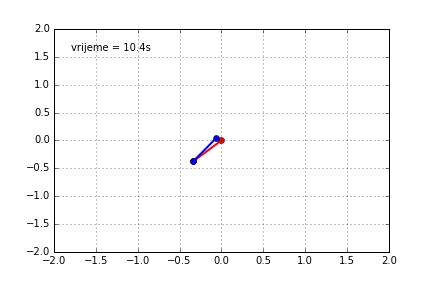
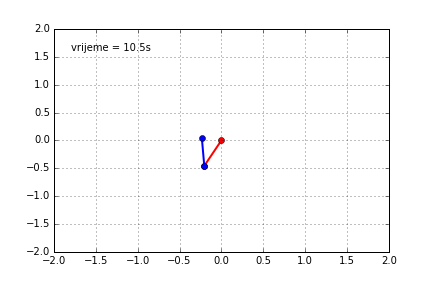
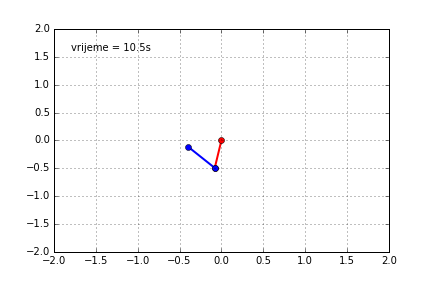
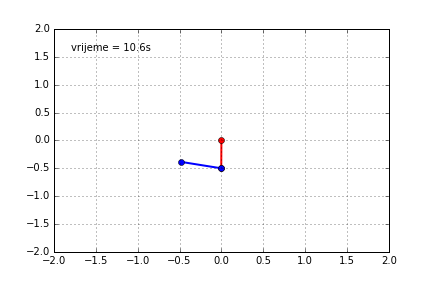
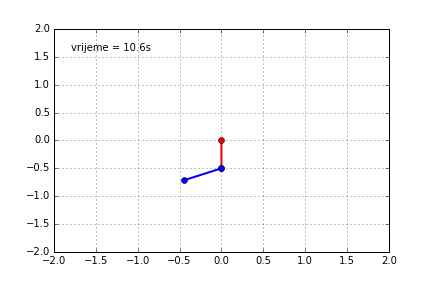
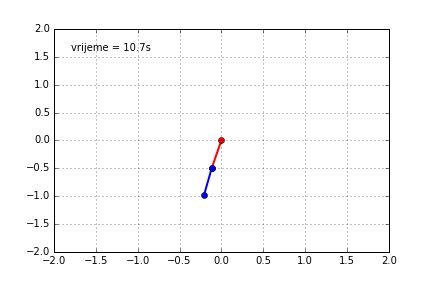
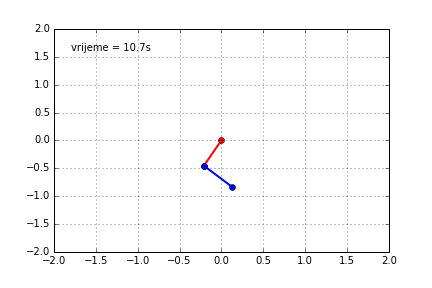
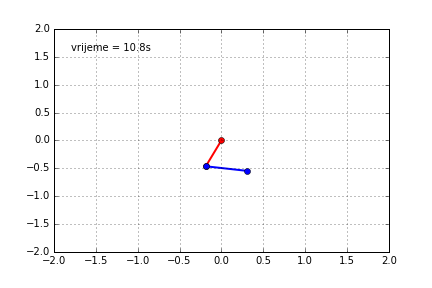
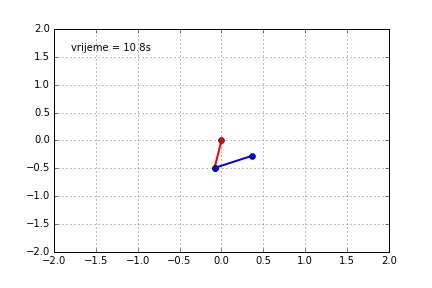
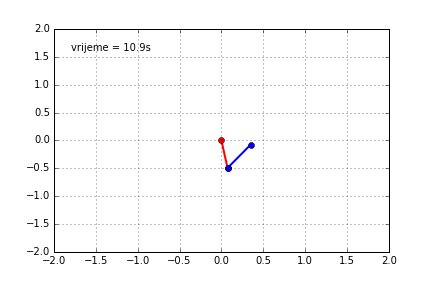
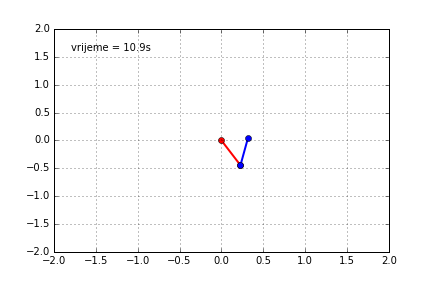
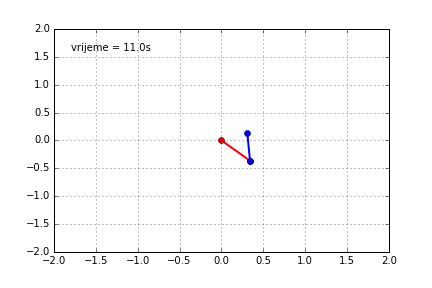
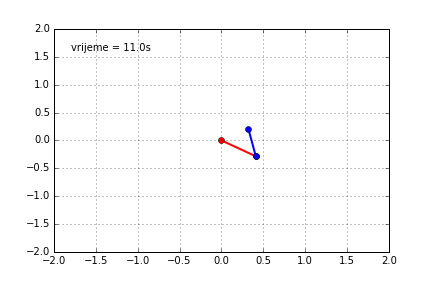
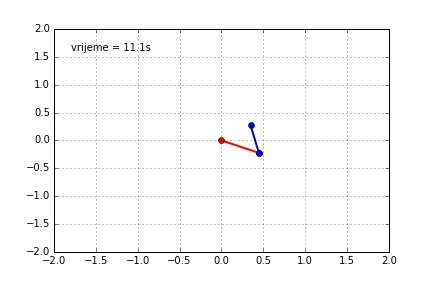
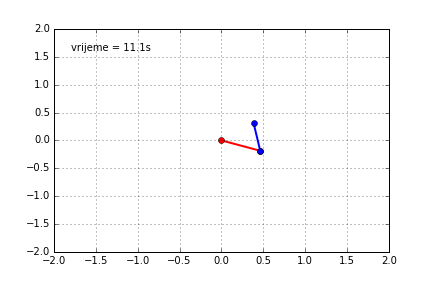
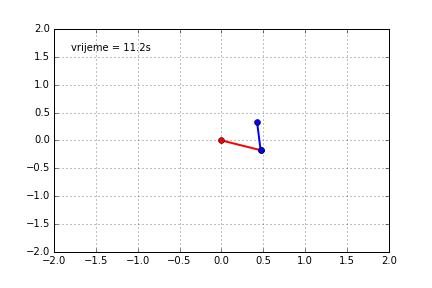
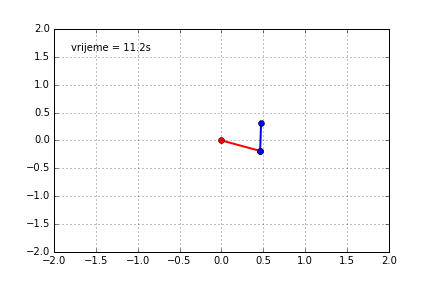
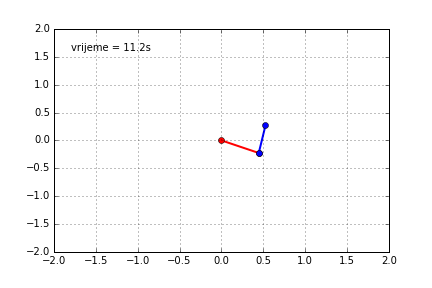
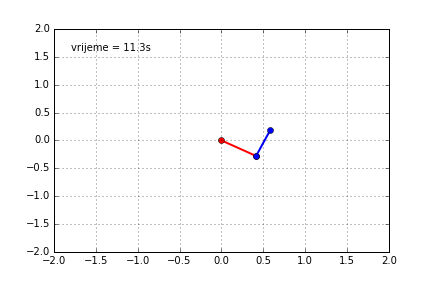
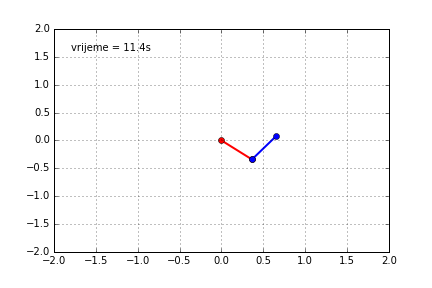
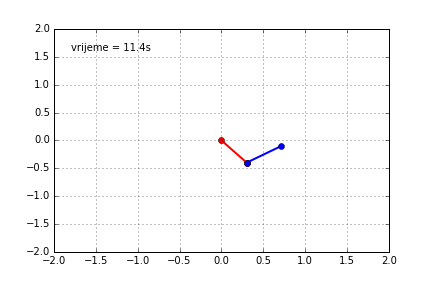
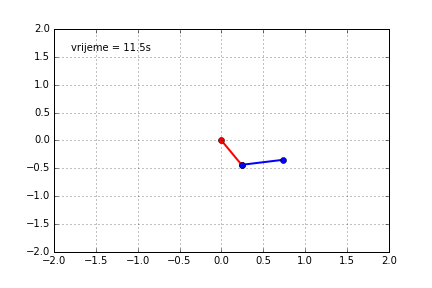
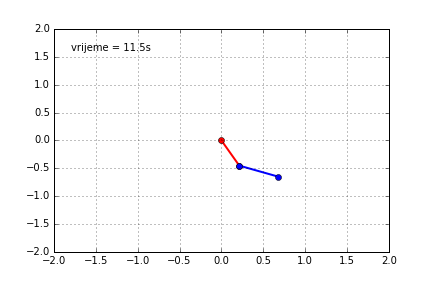
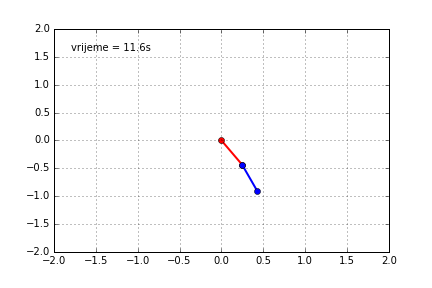
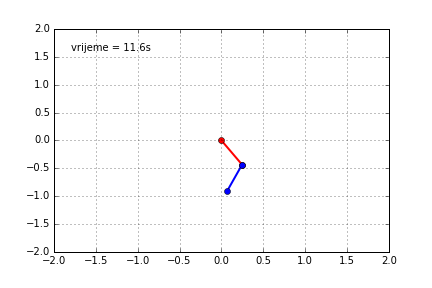
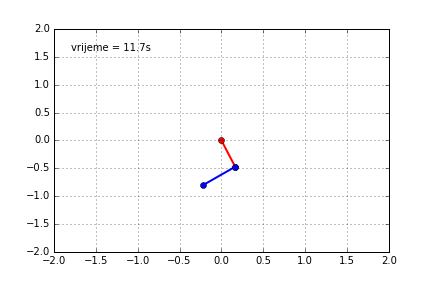
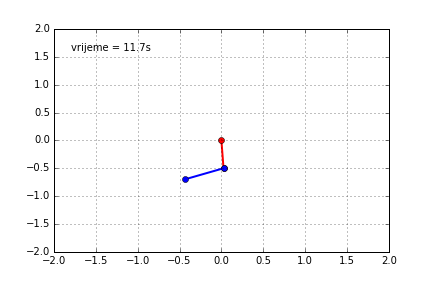
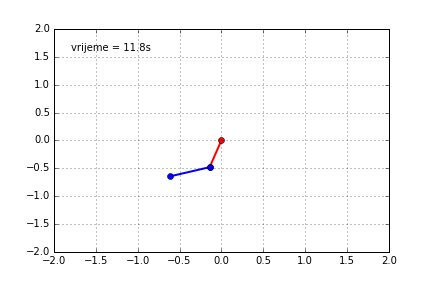
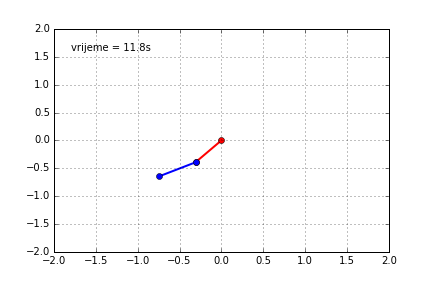
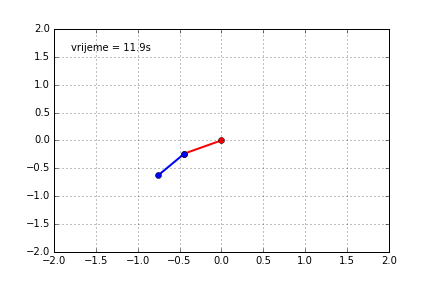
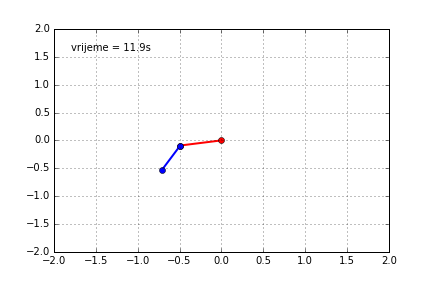
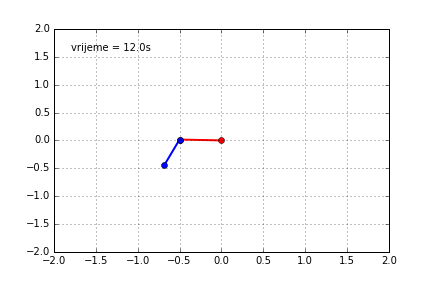
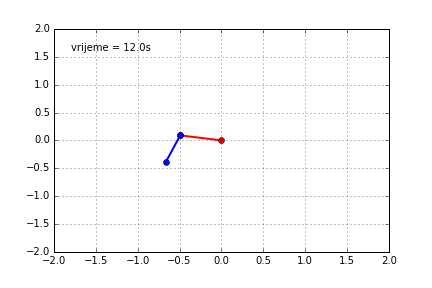
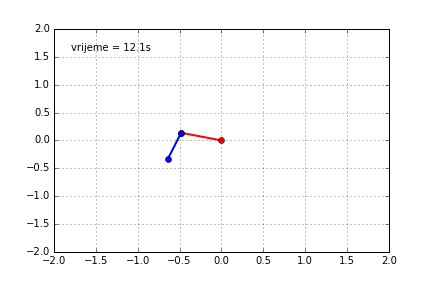
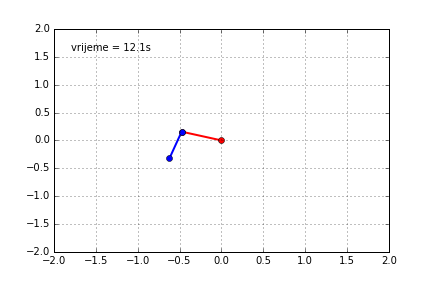
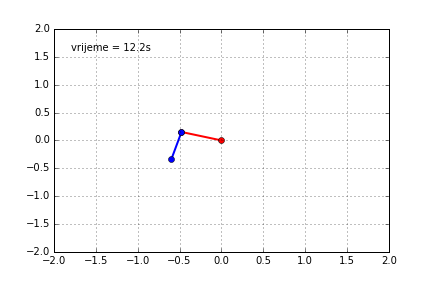
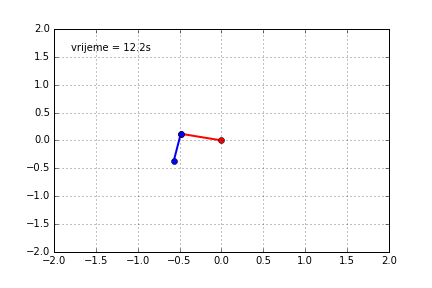
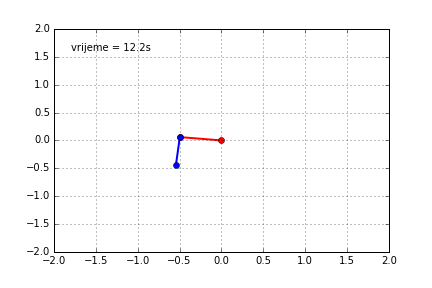
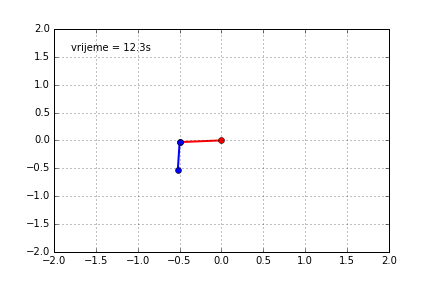
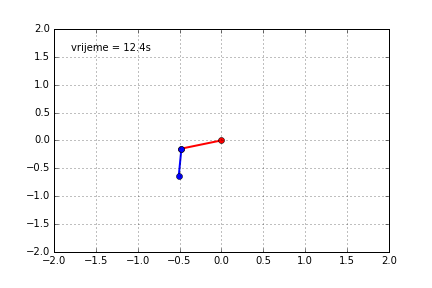
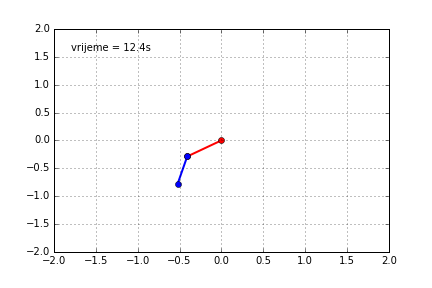
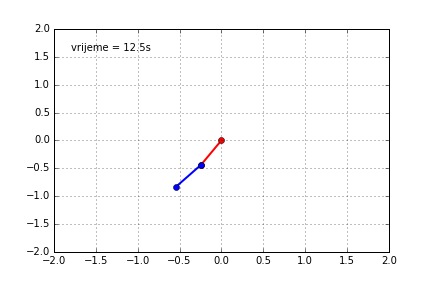
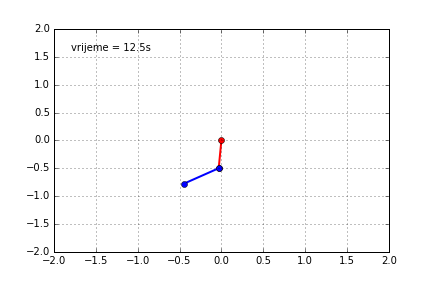
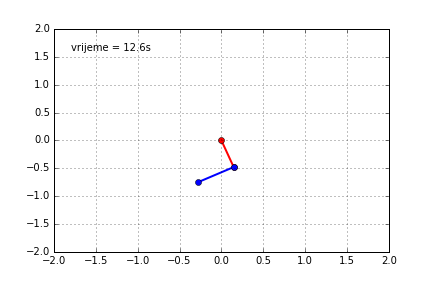
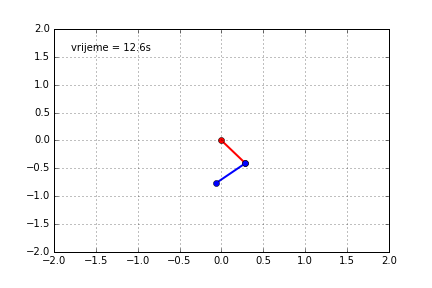
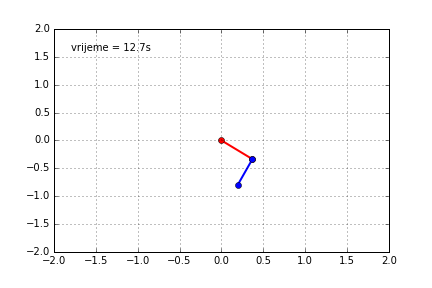
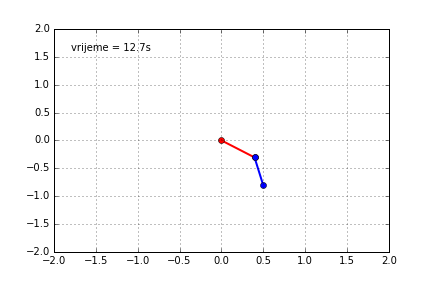
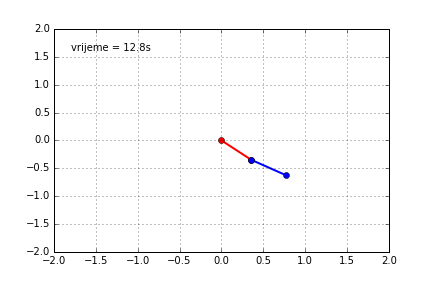
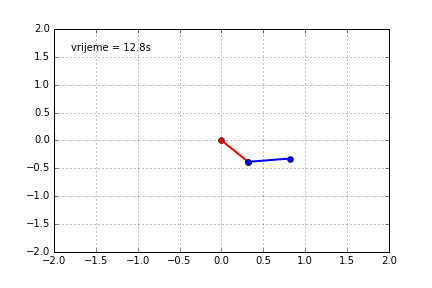
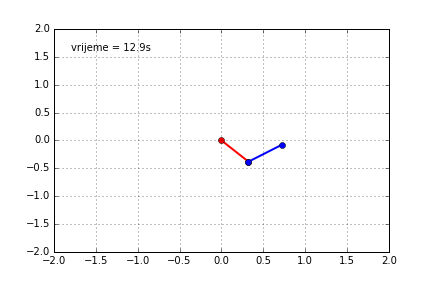
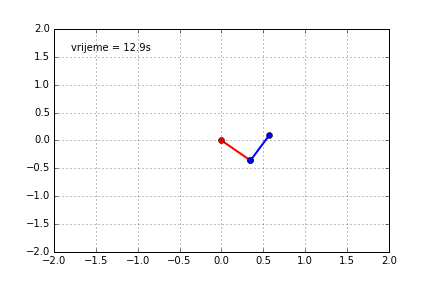
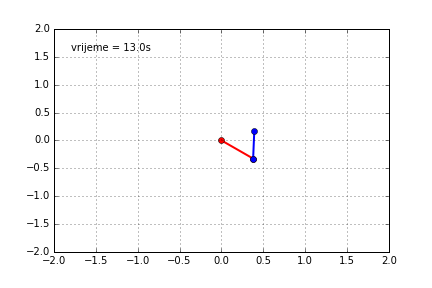
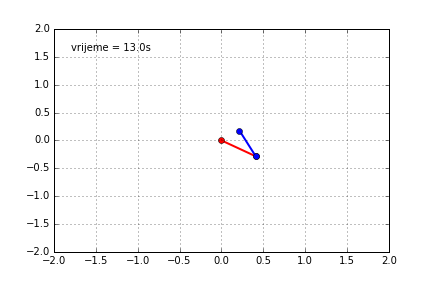
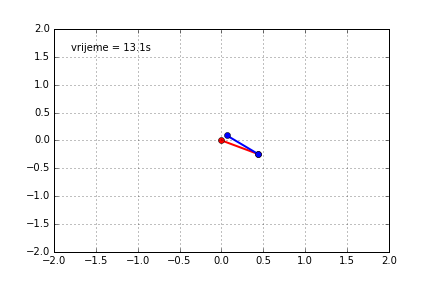
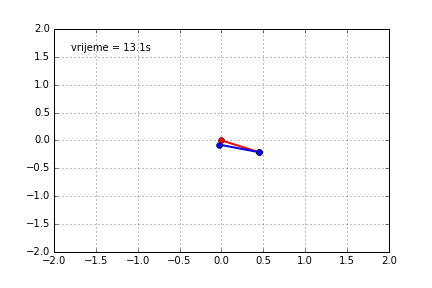
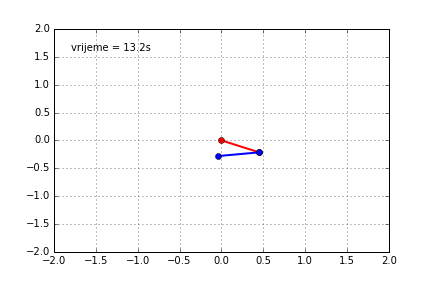
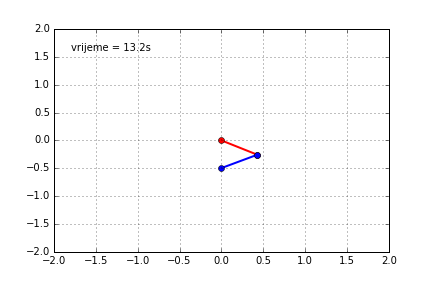
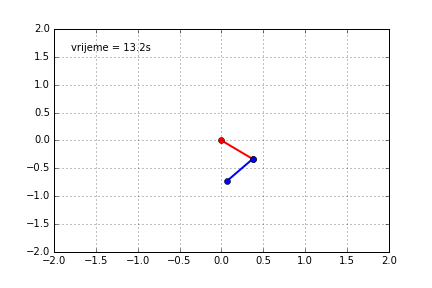
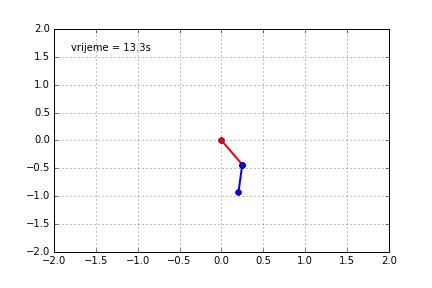
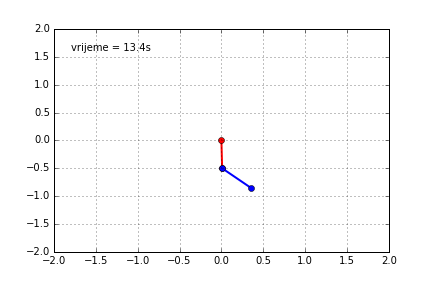
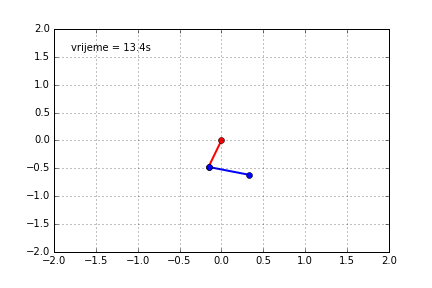
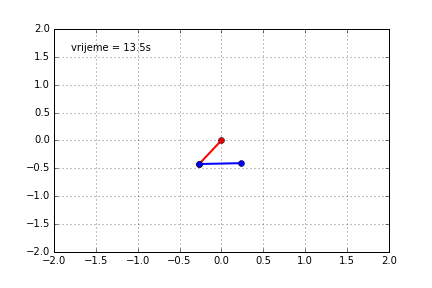
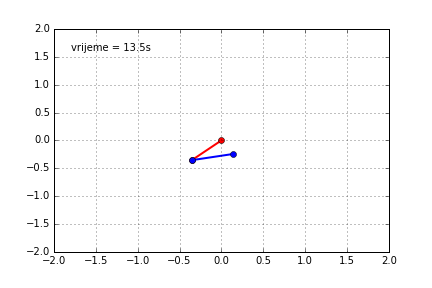
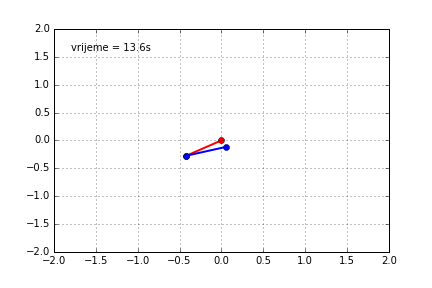
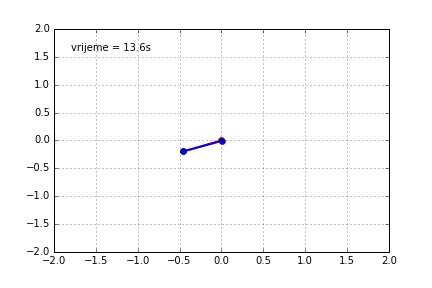
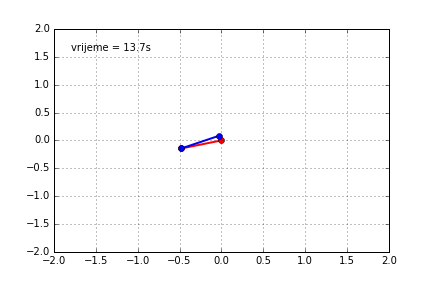
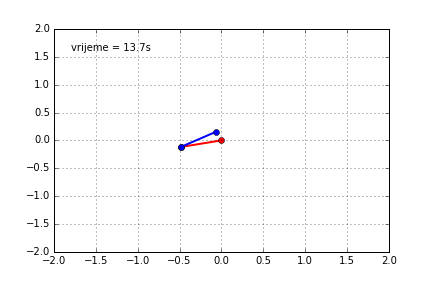
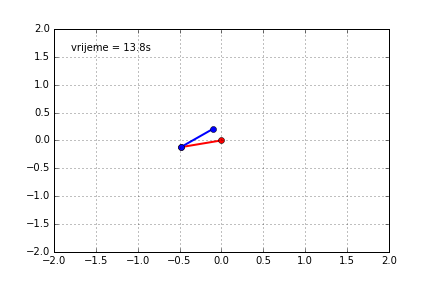
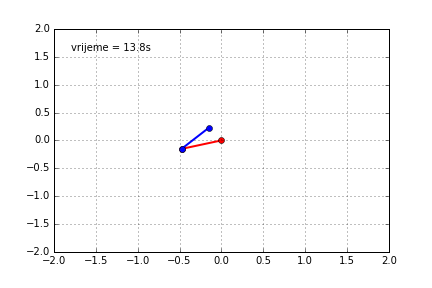
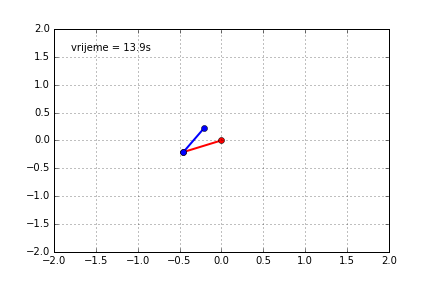
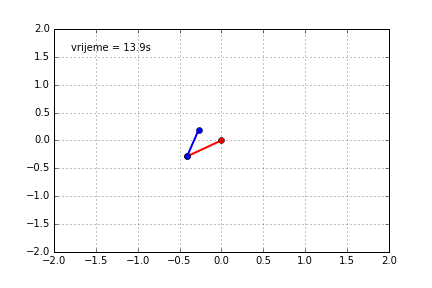
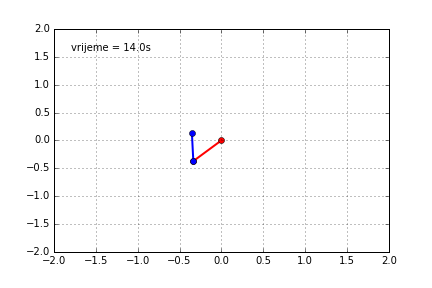
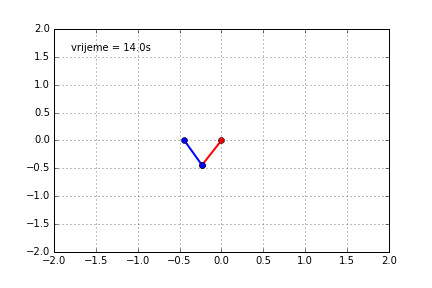
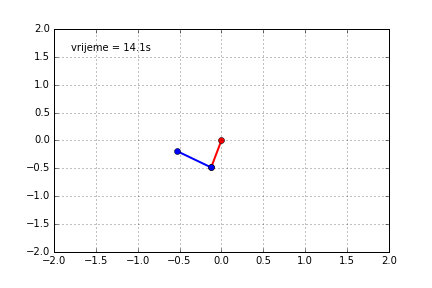
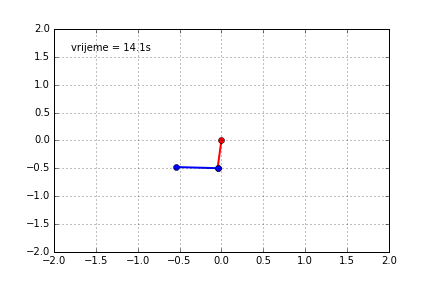
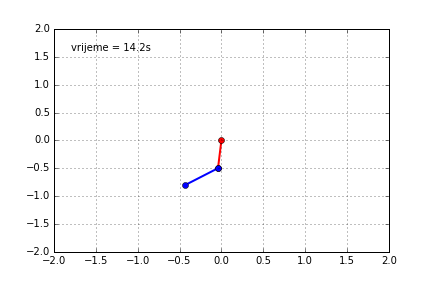
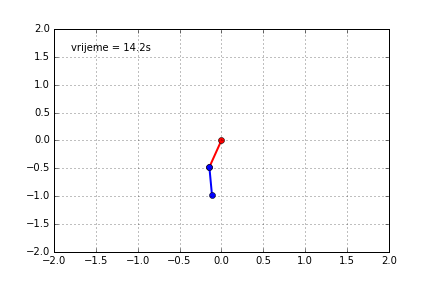
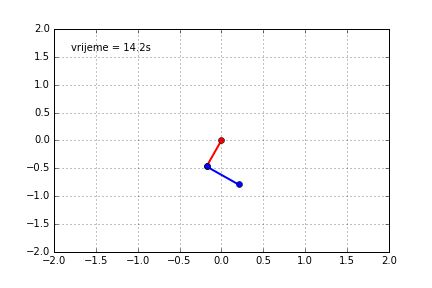
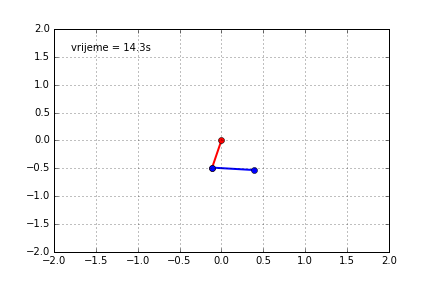
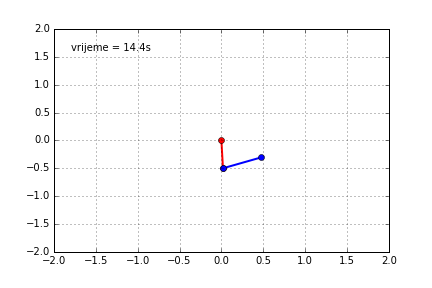
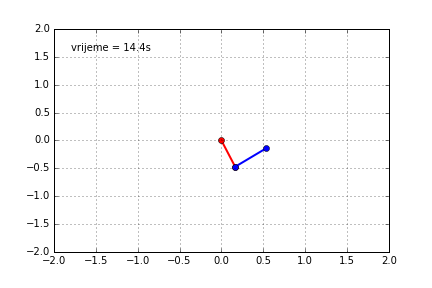
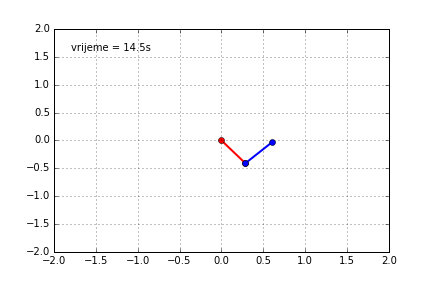
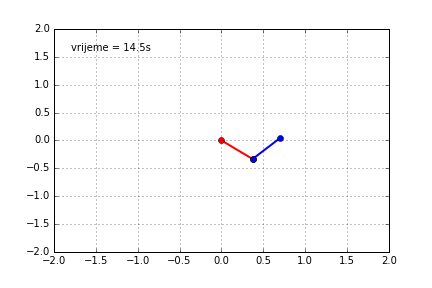
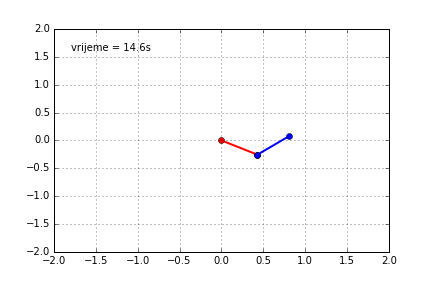
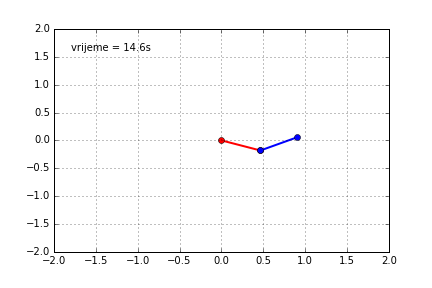
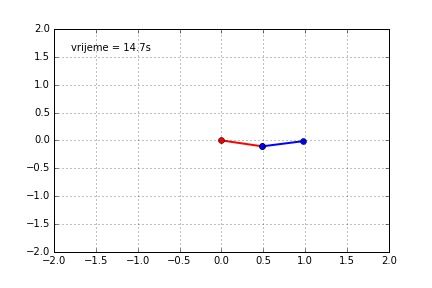
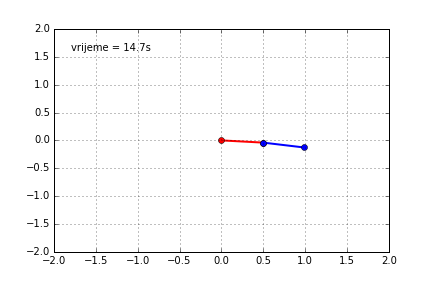
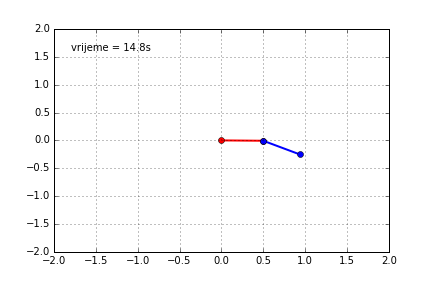
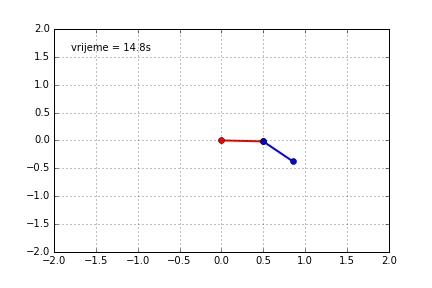
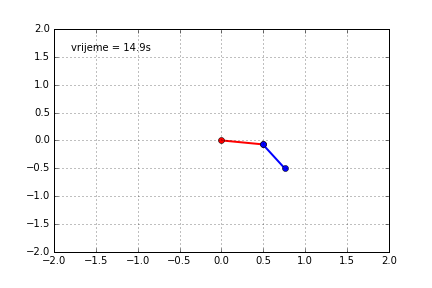
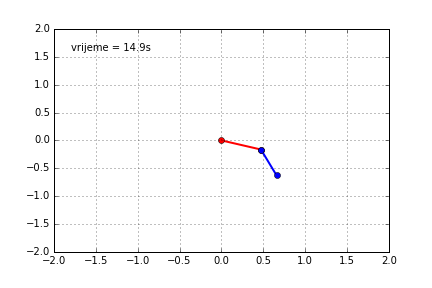
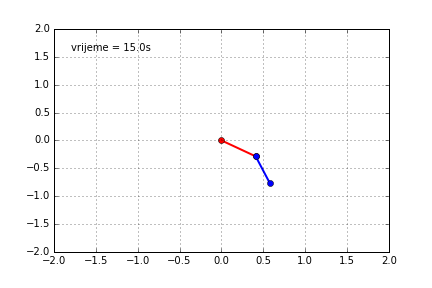
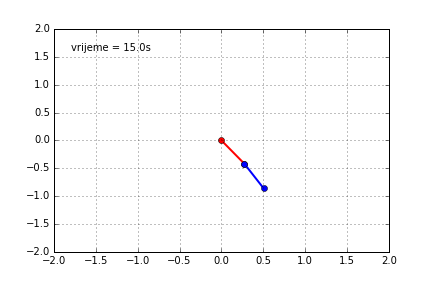
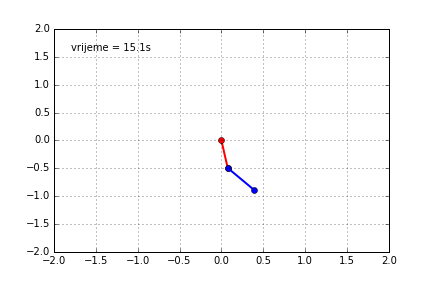
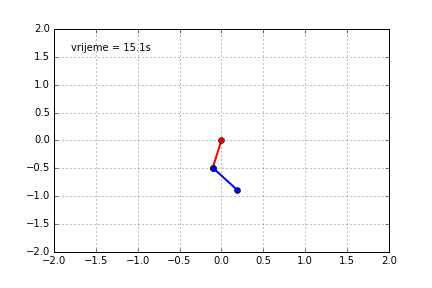
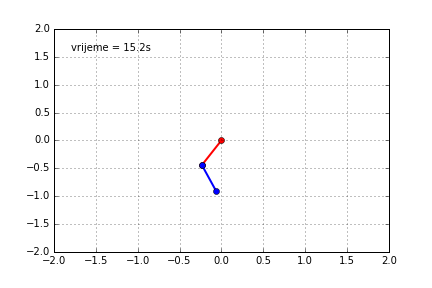
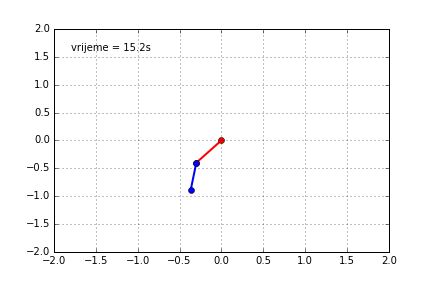
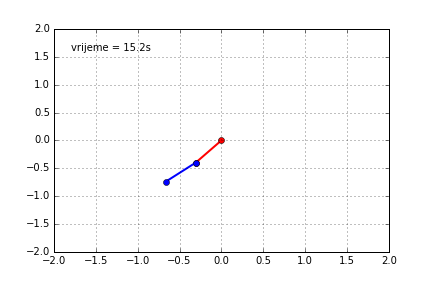
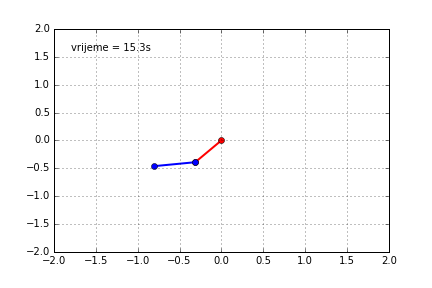
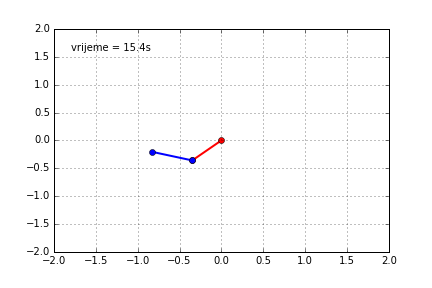
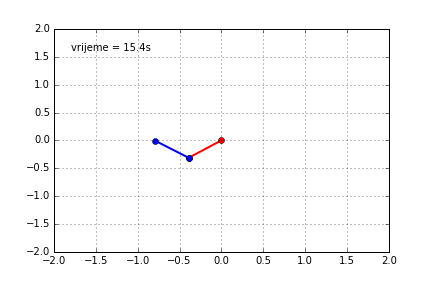
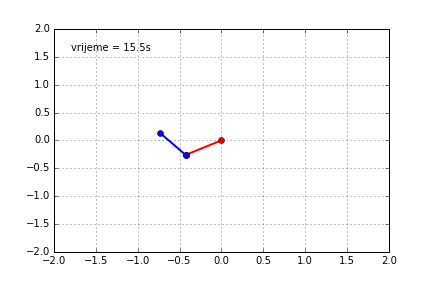
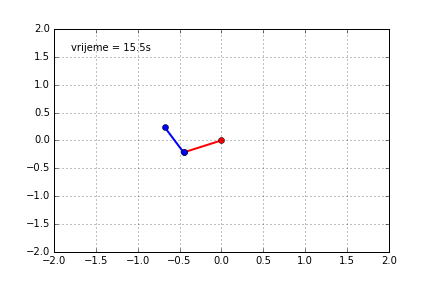
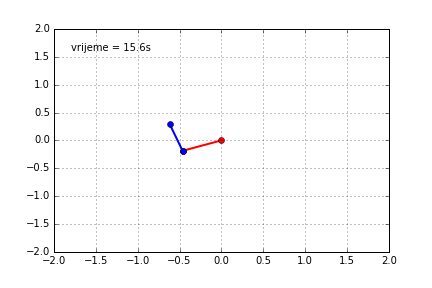
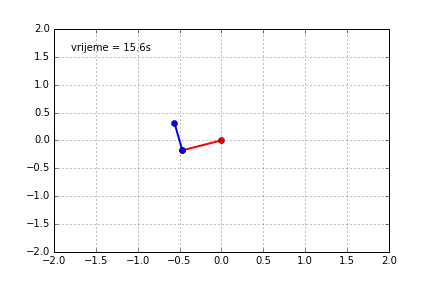
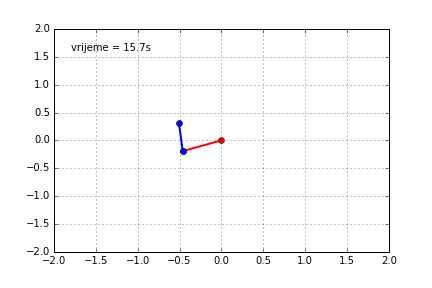
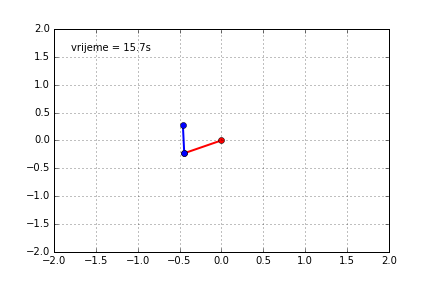
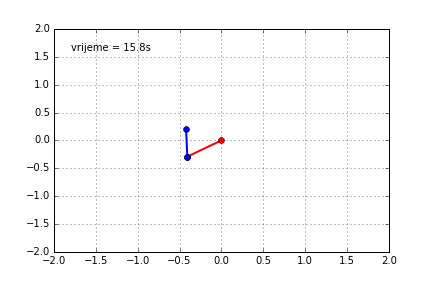
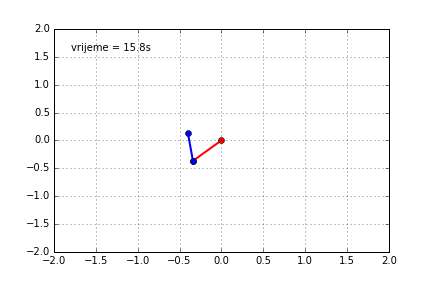
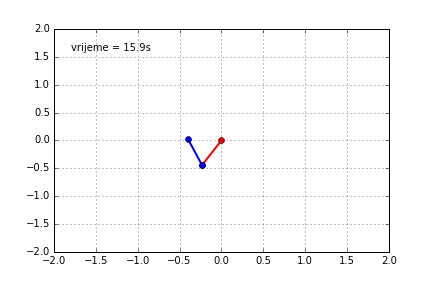
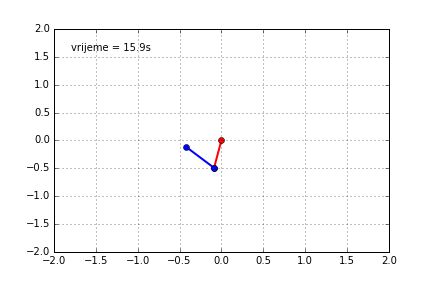
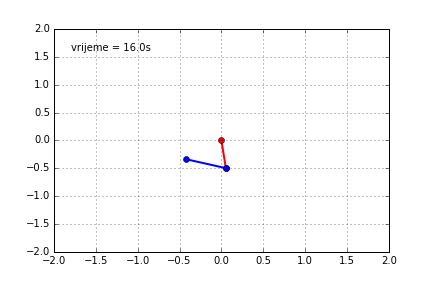
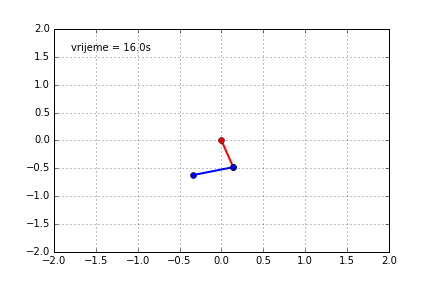
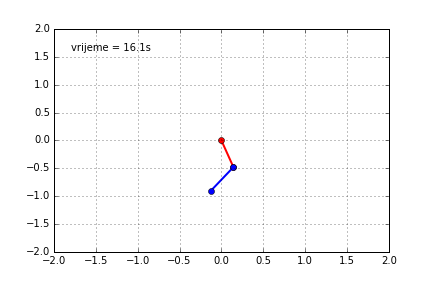
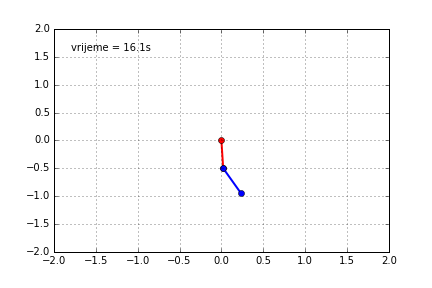
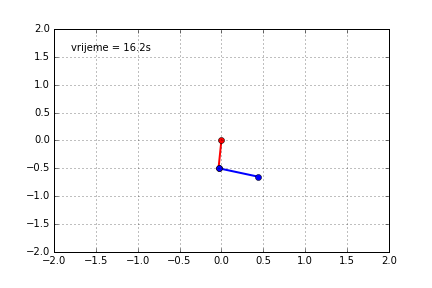
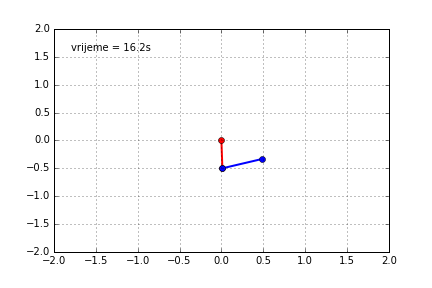
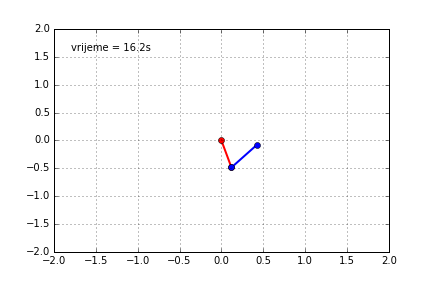
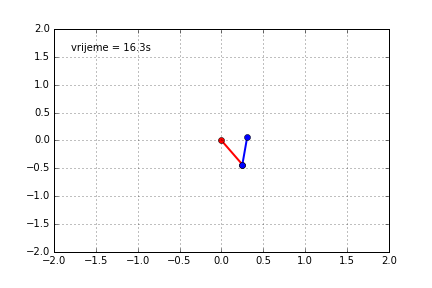
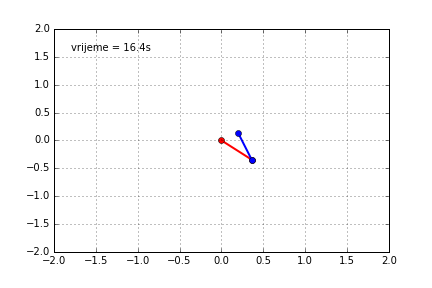
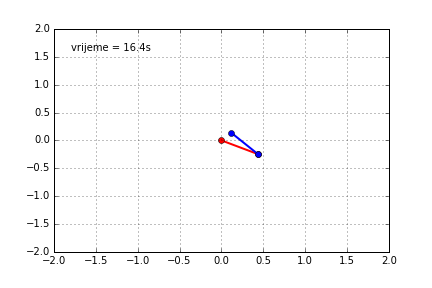
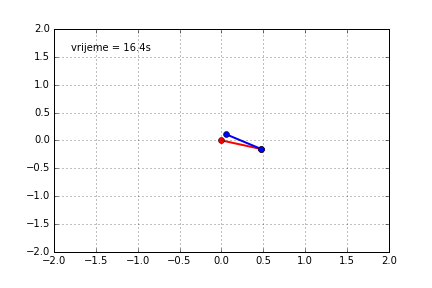
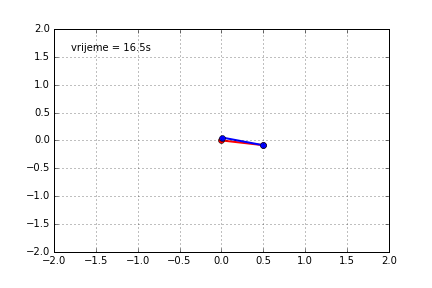
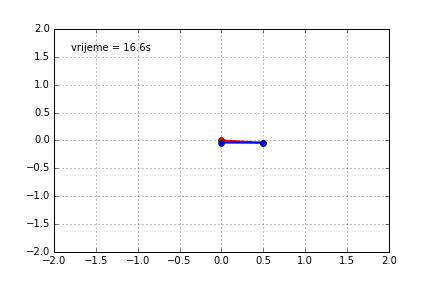
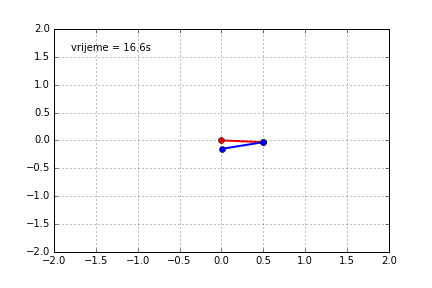
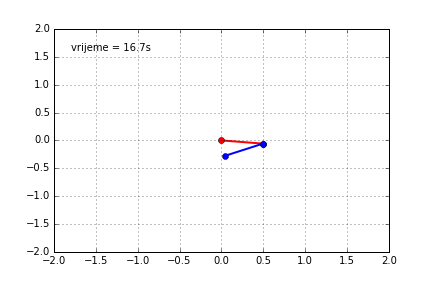
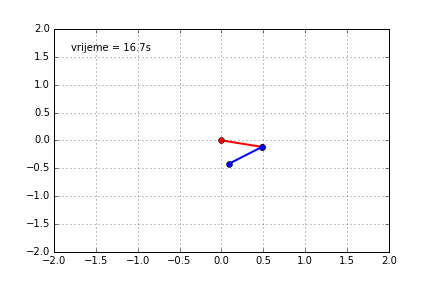
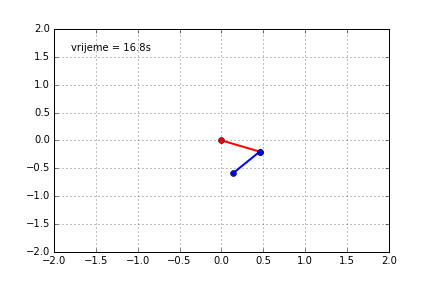
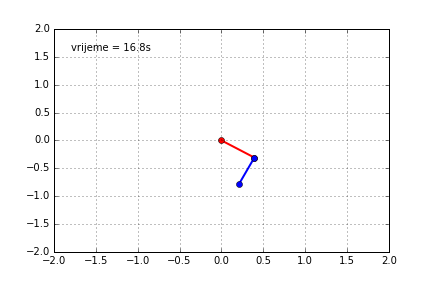
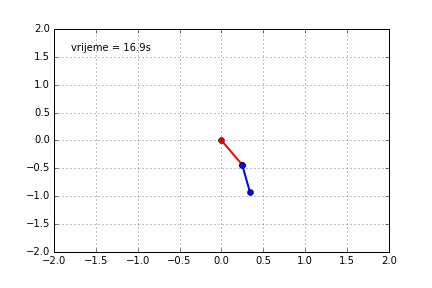
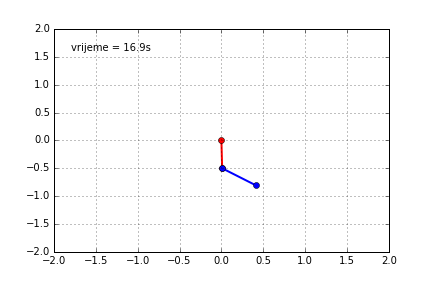
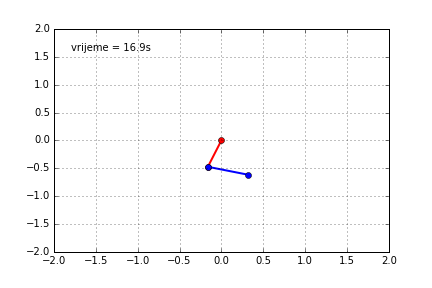
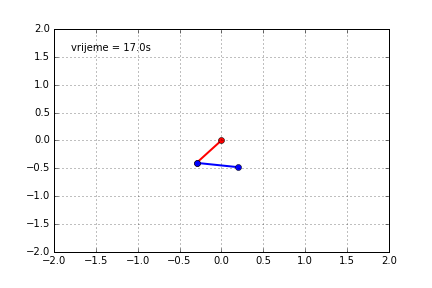
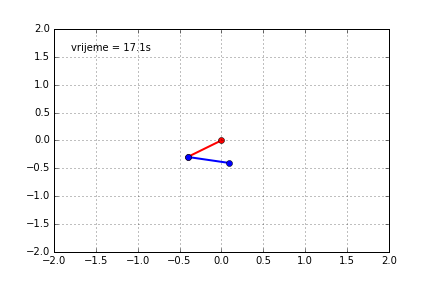
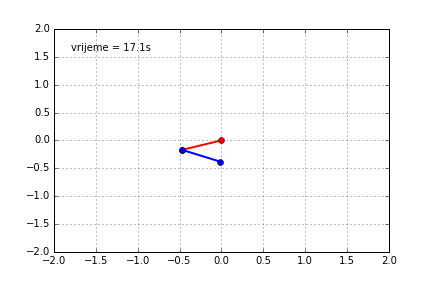
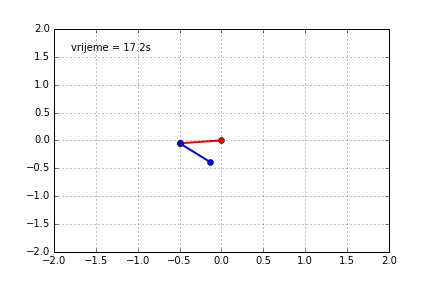
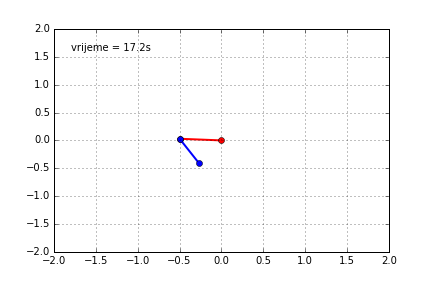
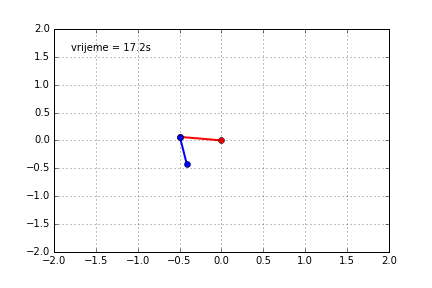
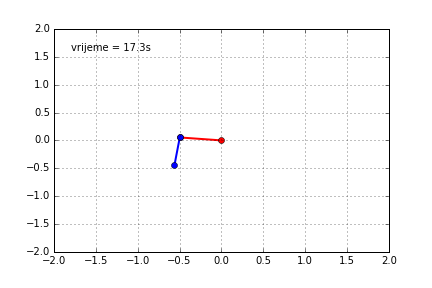
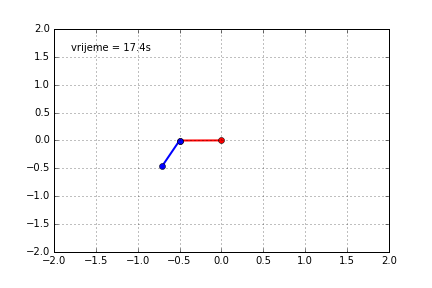
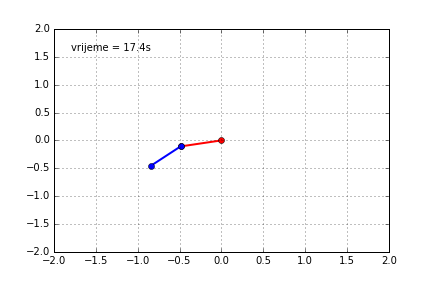
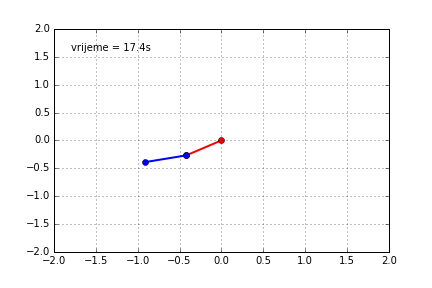
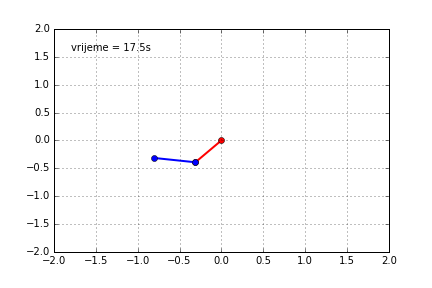
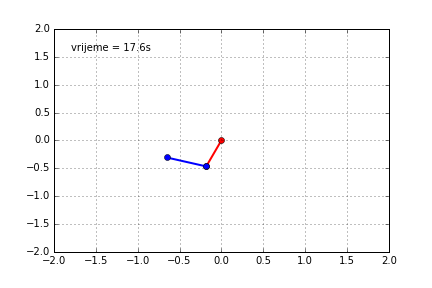
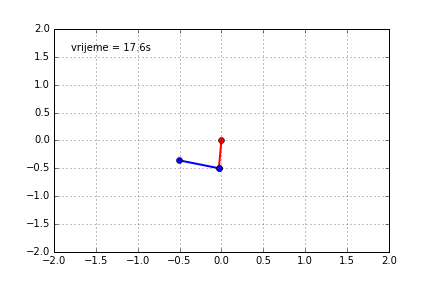
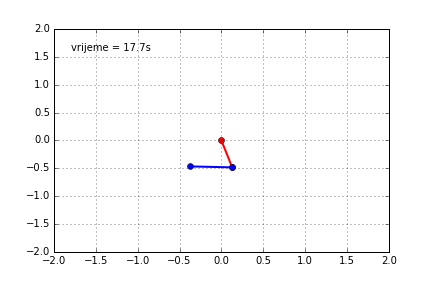
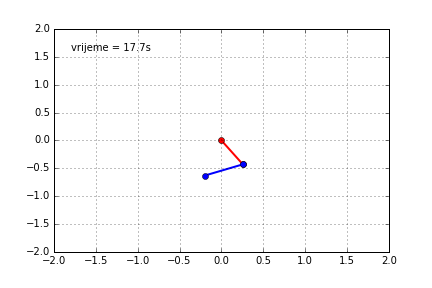
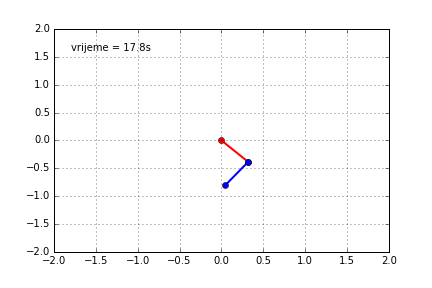
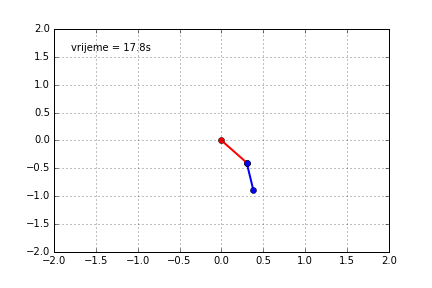
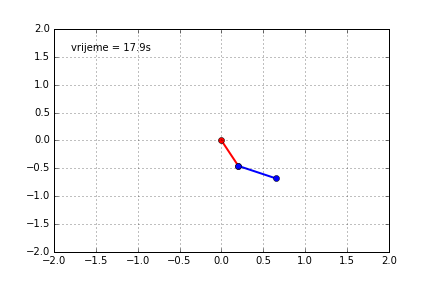
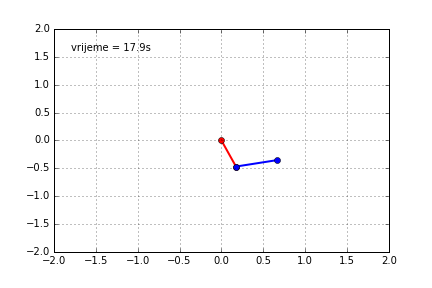
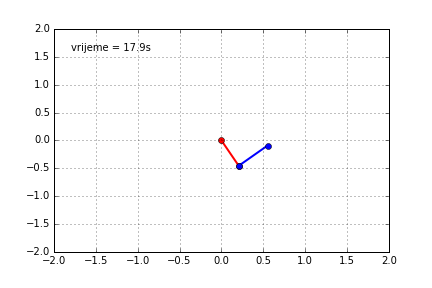
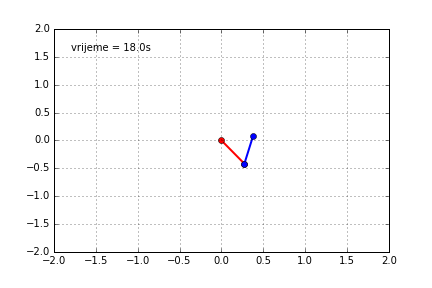
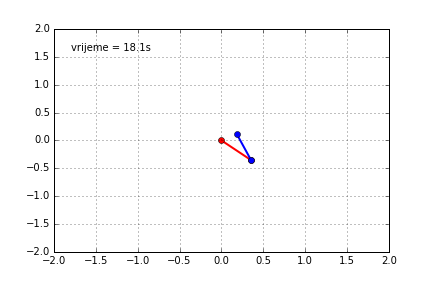
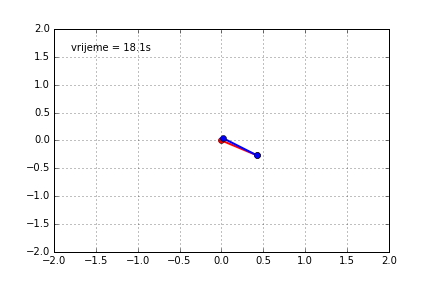
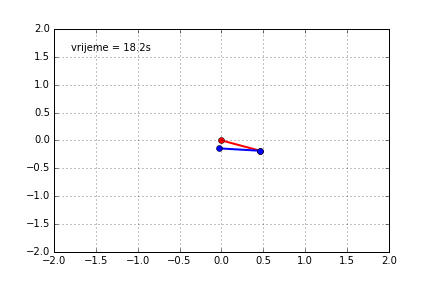
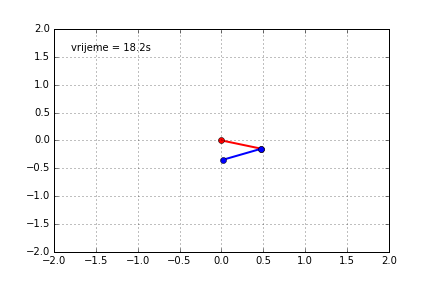
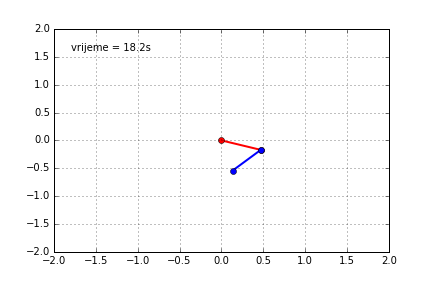
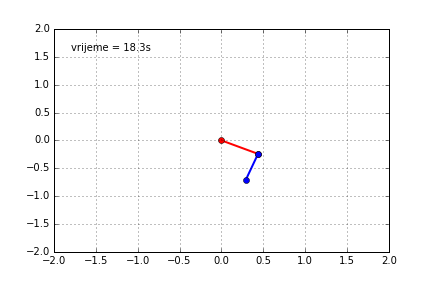
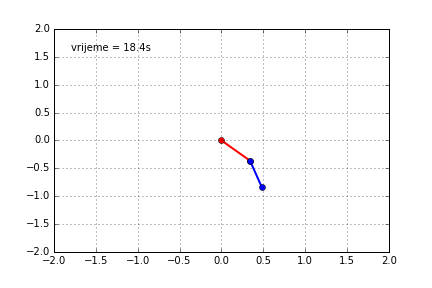
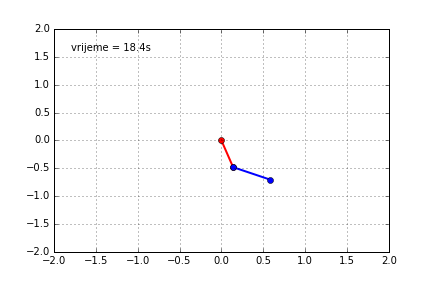
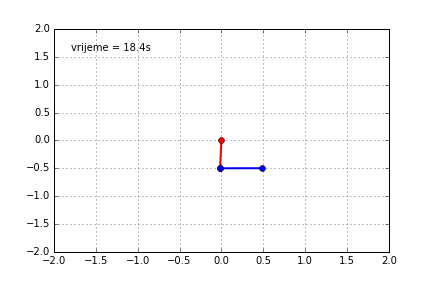
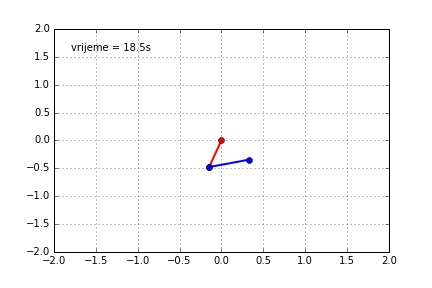
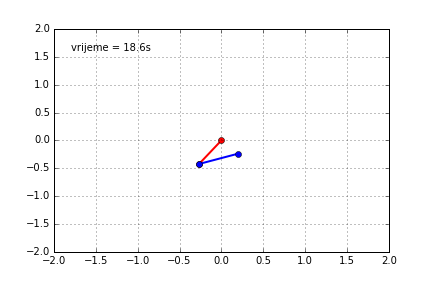
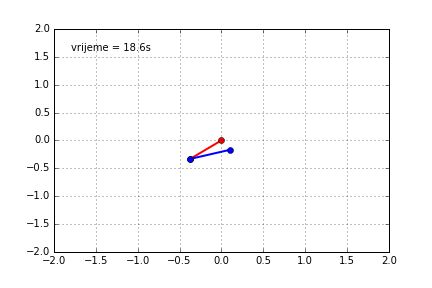
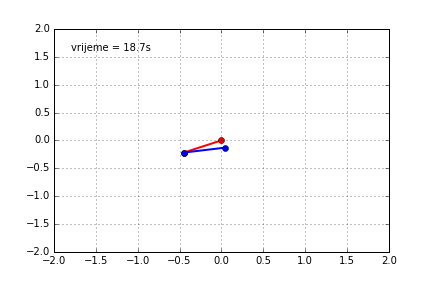
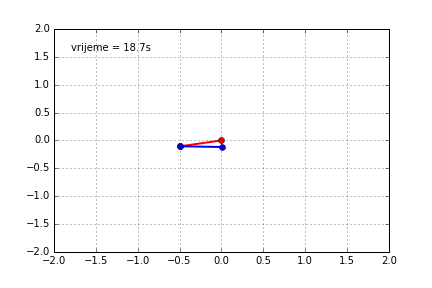
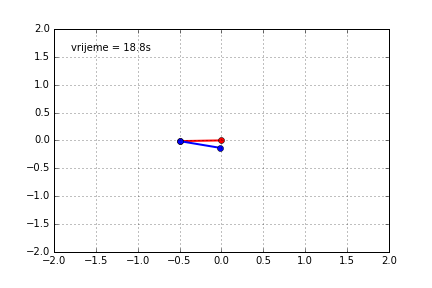
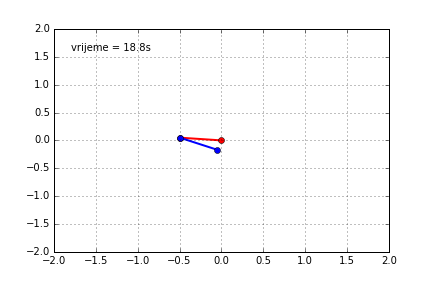
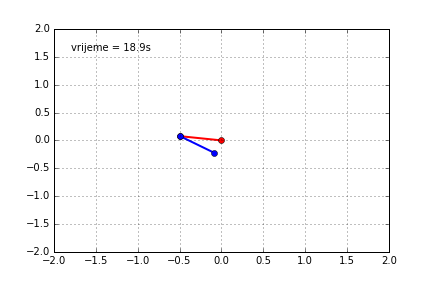
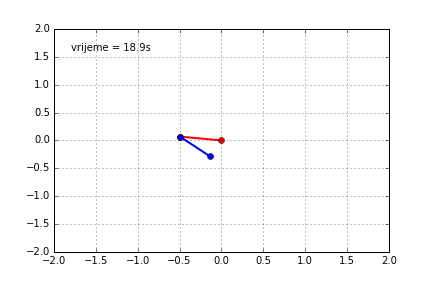
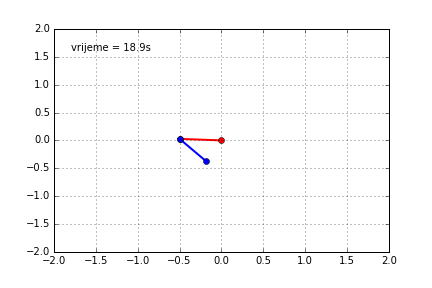
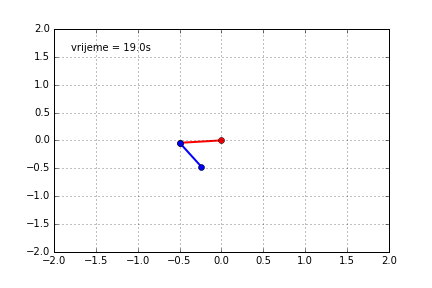
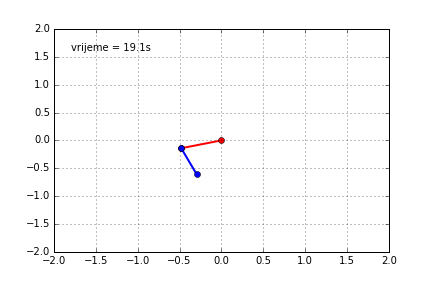
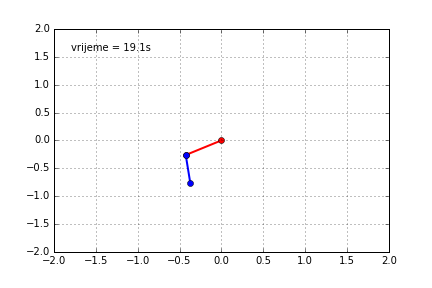
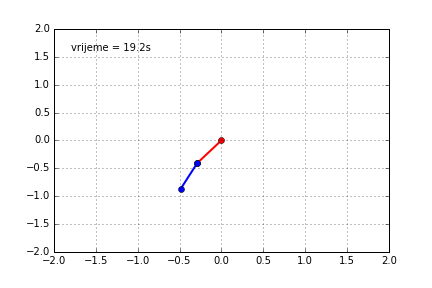
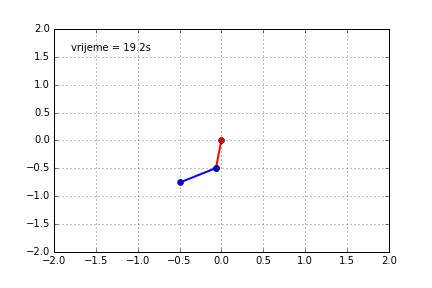
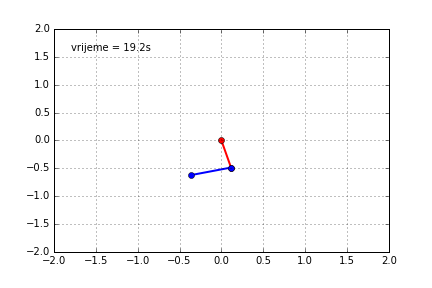
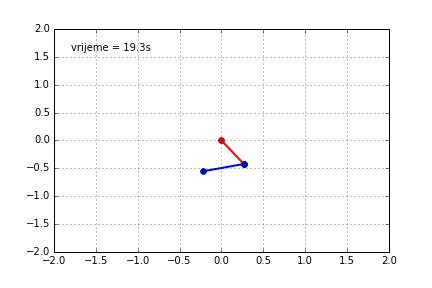
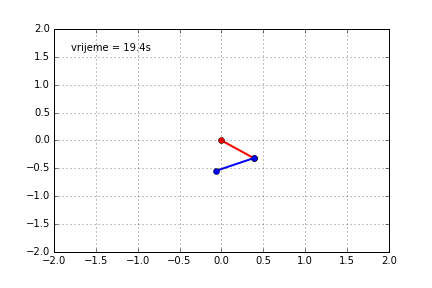
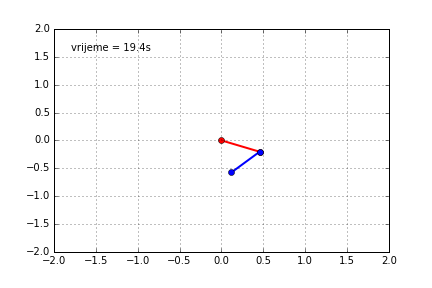
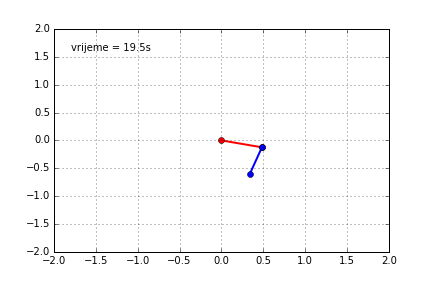
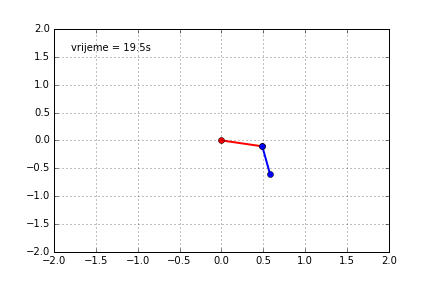
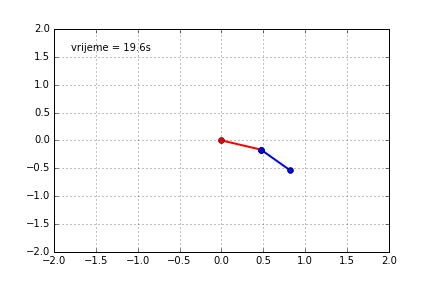
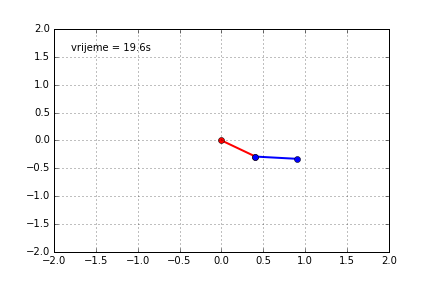
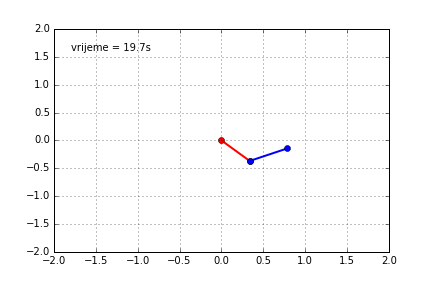
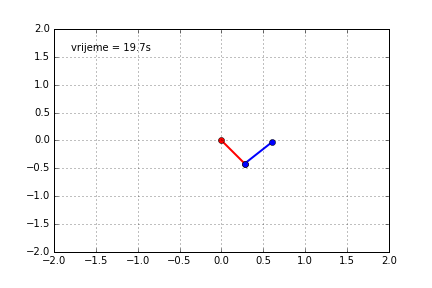
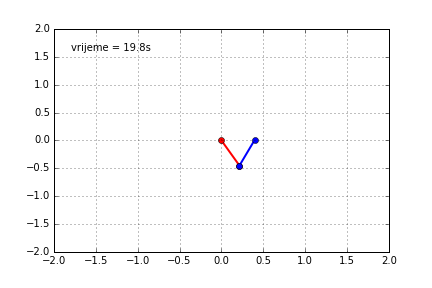
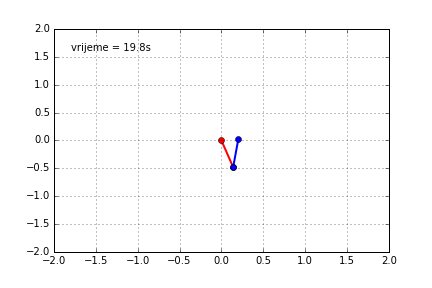
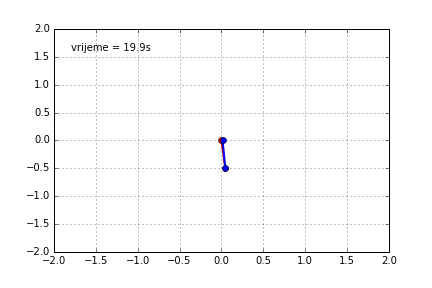
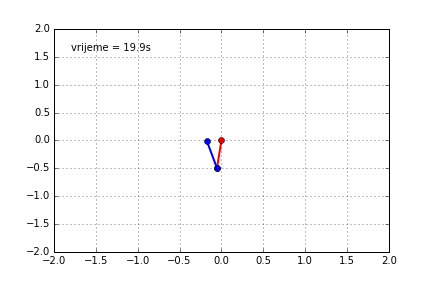
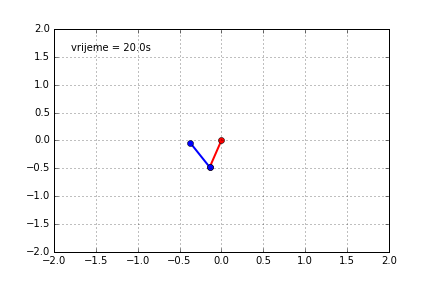

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

#line, = ax.plot([], [], 'o-', lw=2)
pendulum1, = ax.plot([], [], 'o-', color="red", lw=2)
pendulum2, = ax.plot([], [], 'o-', color="blue", lw=2)
time_template = 'vrijeme = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    pendulum1.set_data([], [])
    pendulum2.set_data([], [])
    time_text.set_text('')
    return pendulum1, pendulum2, time_text


def animate(i):

    pendulum1.set_data([0,x1[i]], [0,y1[i]])
    pendulum2.set_data([x1[i],x2[i]],[y1[i],y2[i]])
    time_text.set_text(time_template % (i*dt))
    return pendulum1, pendulum2, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(x)),
                              interval=25, blit=True, init_func=init)
display_animation(ani, default_mode='once')

In [6]:
ani.save('njihalo.gif', writer='imagemagick',fps=4)

In [8]:
from IPython.display import Image
Image(url='njihalo.gif')

Još jedan primjer animacije možete pogledati [ovdje](https://jakevdp.github.io/blog/2013/05/28/a-simple-animation-the-magic-triangle/).